In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import silhouette_score

import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'data/bankrupt_dataset.csv',delimiter=',', decimal='.')

In [4]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

In [7]:
df.duplicated().value_counts()

False    6819
dtype: int64

In [8]:
df.isnull().any().value_counts()

False    96
dtype: int64

In [9]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Bankrupt?                                                       AxesSubplot(0.125,0.84472;0.110714x0.0352804)
 ROA(C) before interest and depreciation before interest     AxesSubplot(0.257857,0.84472;0.110714x0.0352804)
 ROA(A) before interest and % after tax                      AxesSubplot(0.390714,0.84472;0.110714x0.0352804)
 ROA(B) before interest and depreciation after tax           AxesSubplot(0.523571,0.84472;0.110714x0.0352804)
 Operating Gross Margin                                      AxesSubplot(0.656429,0.84472;0.110714x0.0352804)
                                                                                  ...                        
 Liability to Equity                                        AxesSubplot(0.257857,0.209673;0.110714x0.0352804)
 Degree of Financial Leverage (DFL)                         AxesSubplot(0.390714,0.209673;0.110714x0.0352804)
 Interest Coverage Ratio (Interest expense to EBIT)         AxesSubplot(0.523571,0.209673;0.110714x0.0352804)
 Net Incom

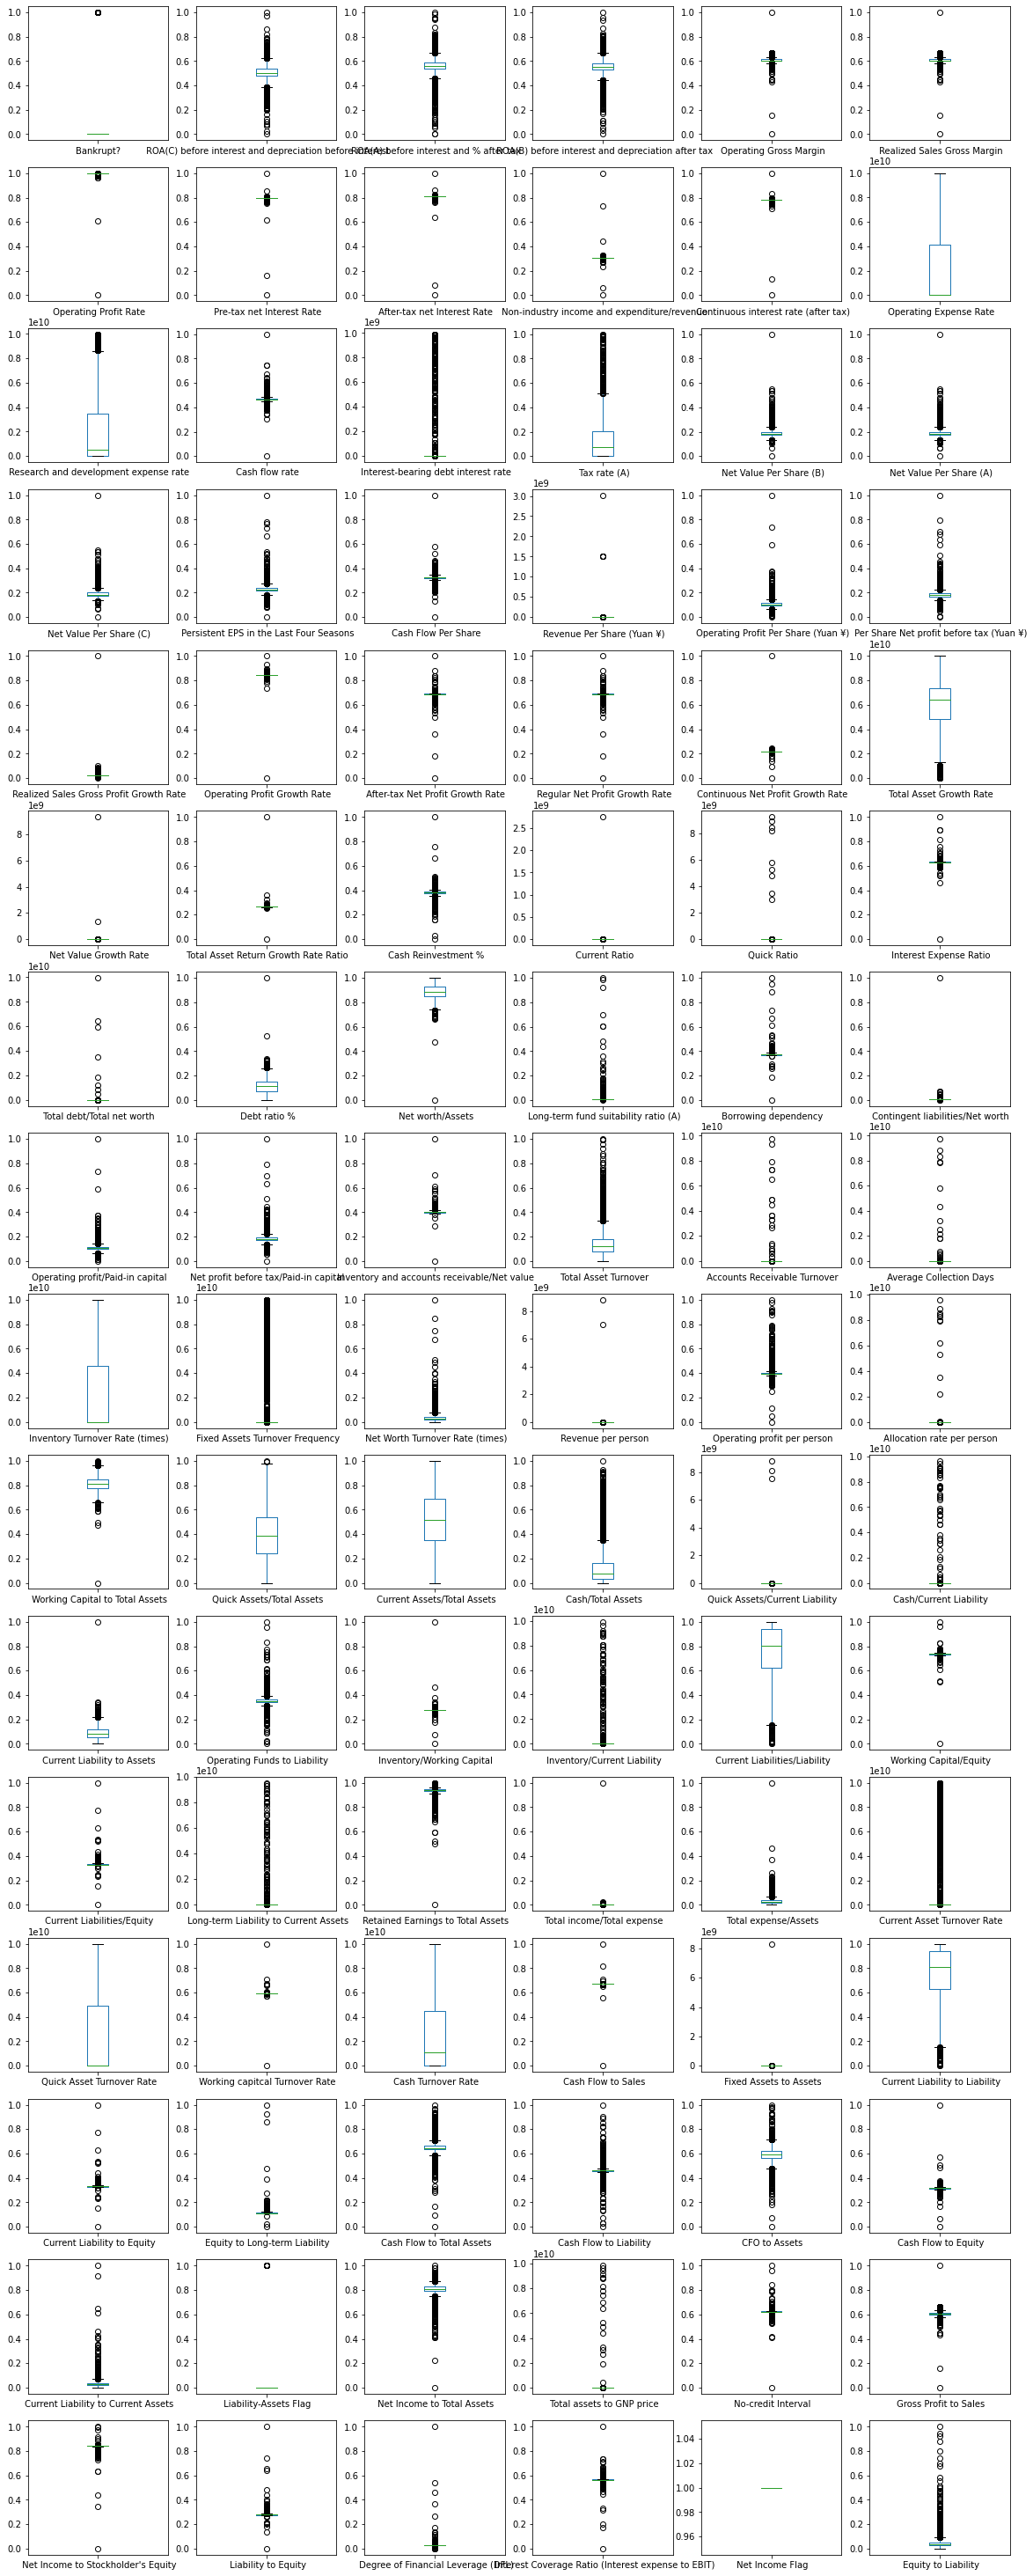

In [10]:
df.plot(kind='box', subplots=True, layout=(18, 6), figsize = (20, 60))

In [11]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [12]:
df = df.drop(' Net Income Flag', axis=1)

In [13]:
len(df.columns[:20])

20

In [14]:
y = df['Bankrupt?']
X = df.drop('Bankrupt?',axis=1)

In [15]:
X20 = X[X.columns[:20]]
X40 = X[X.columns[20:40]] 
X60 = X[X.columns[40:60]] 
X80 = X[X.columns[60:80]]
X95 = X[X.columns[80:]] 

In [16]:
# for column in X20.columns:
#     plt.figure()
#     sns.distplot(X20[column])

In [ ]:
sns.pairplot(df[df.columns[:20]], kind="kde")

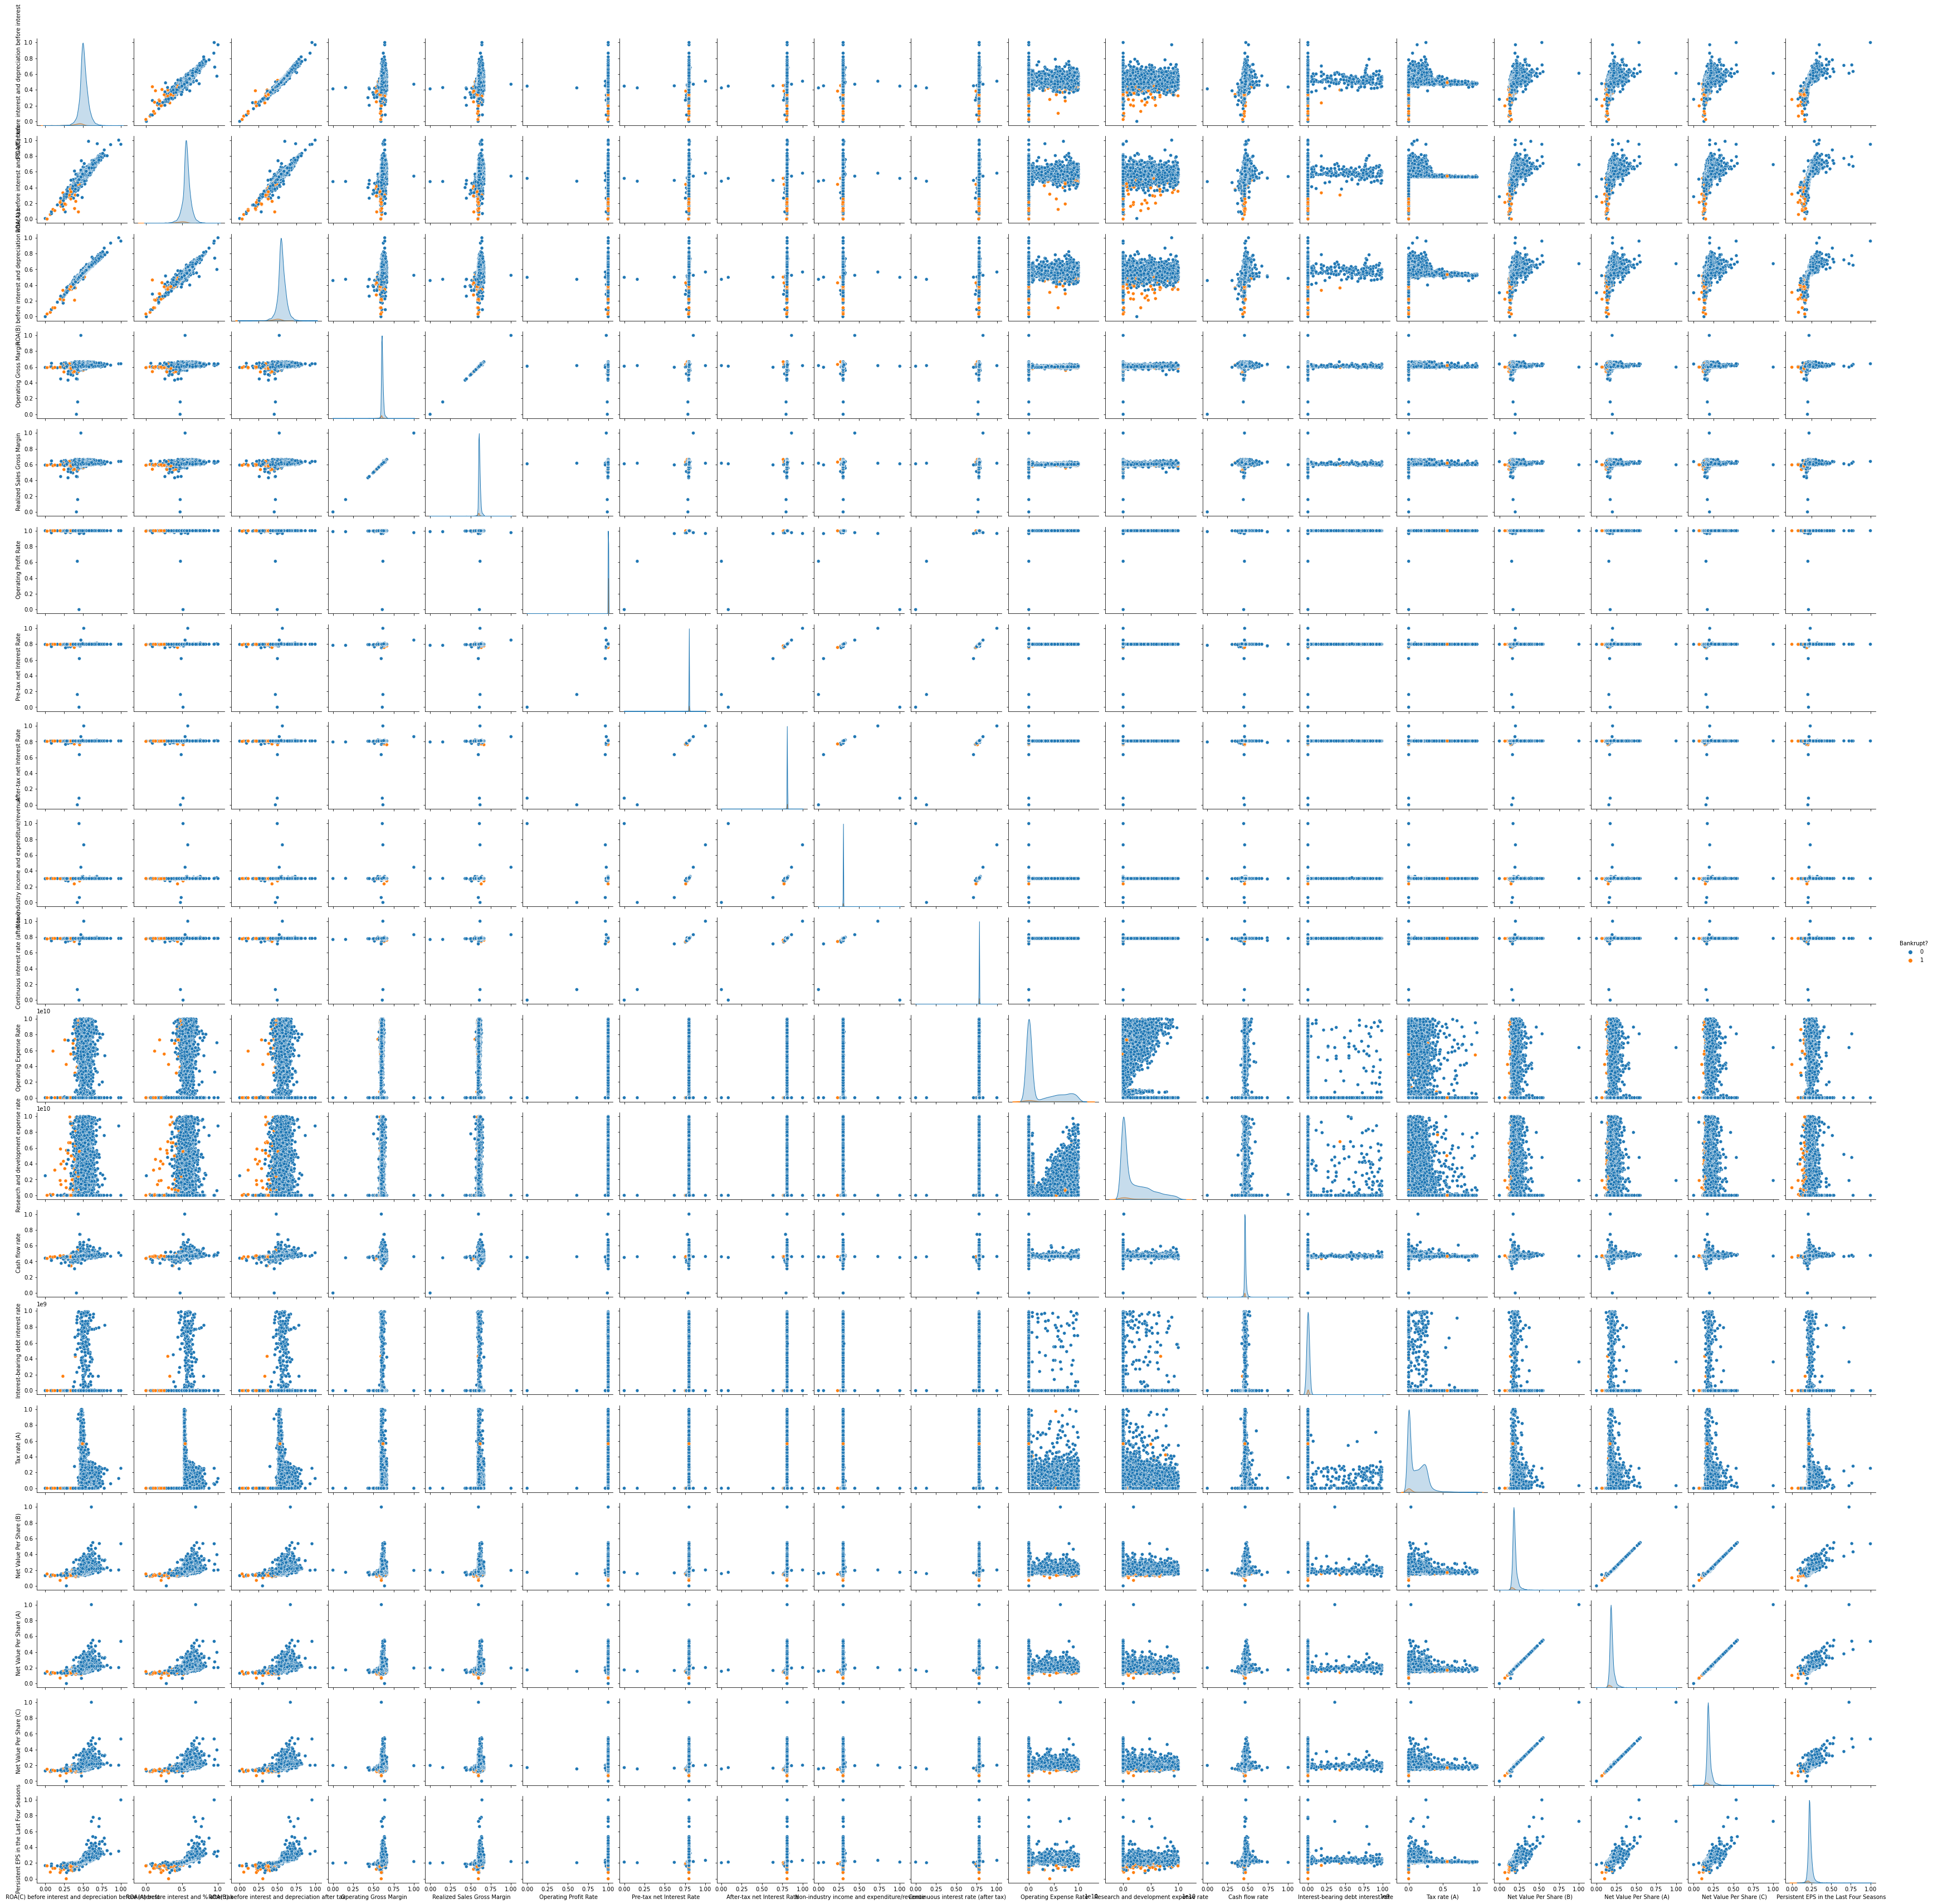

In [106]:
sns.pairplot(df[df.columns[:20]], hue='Bankrupt?')

array([[<AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' ROA(A) before interest and % after tax'}>,
        <AxesSubplot:title={'center':' ROA(B) before interest and depreciation after tax'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>],
       [<AxesSubplot:title={'center':' Realized Sales Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Pre-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' After-tax net Interest Rate'}>],
       [<AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot:title={'center':' Continuous interest rate (after tax)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>],
       [<AxesSubplot:title={'center':' Cash flow rate'}>,
        <

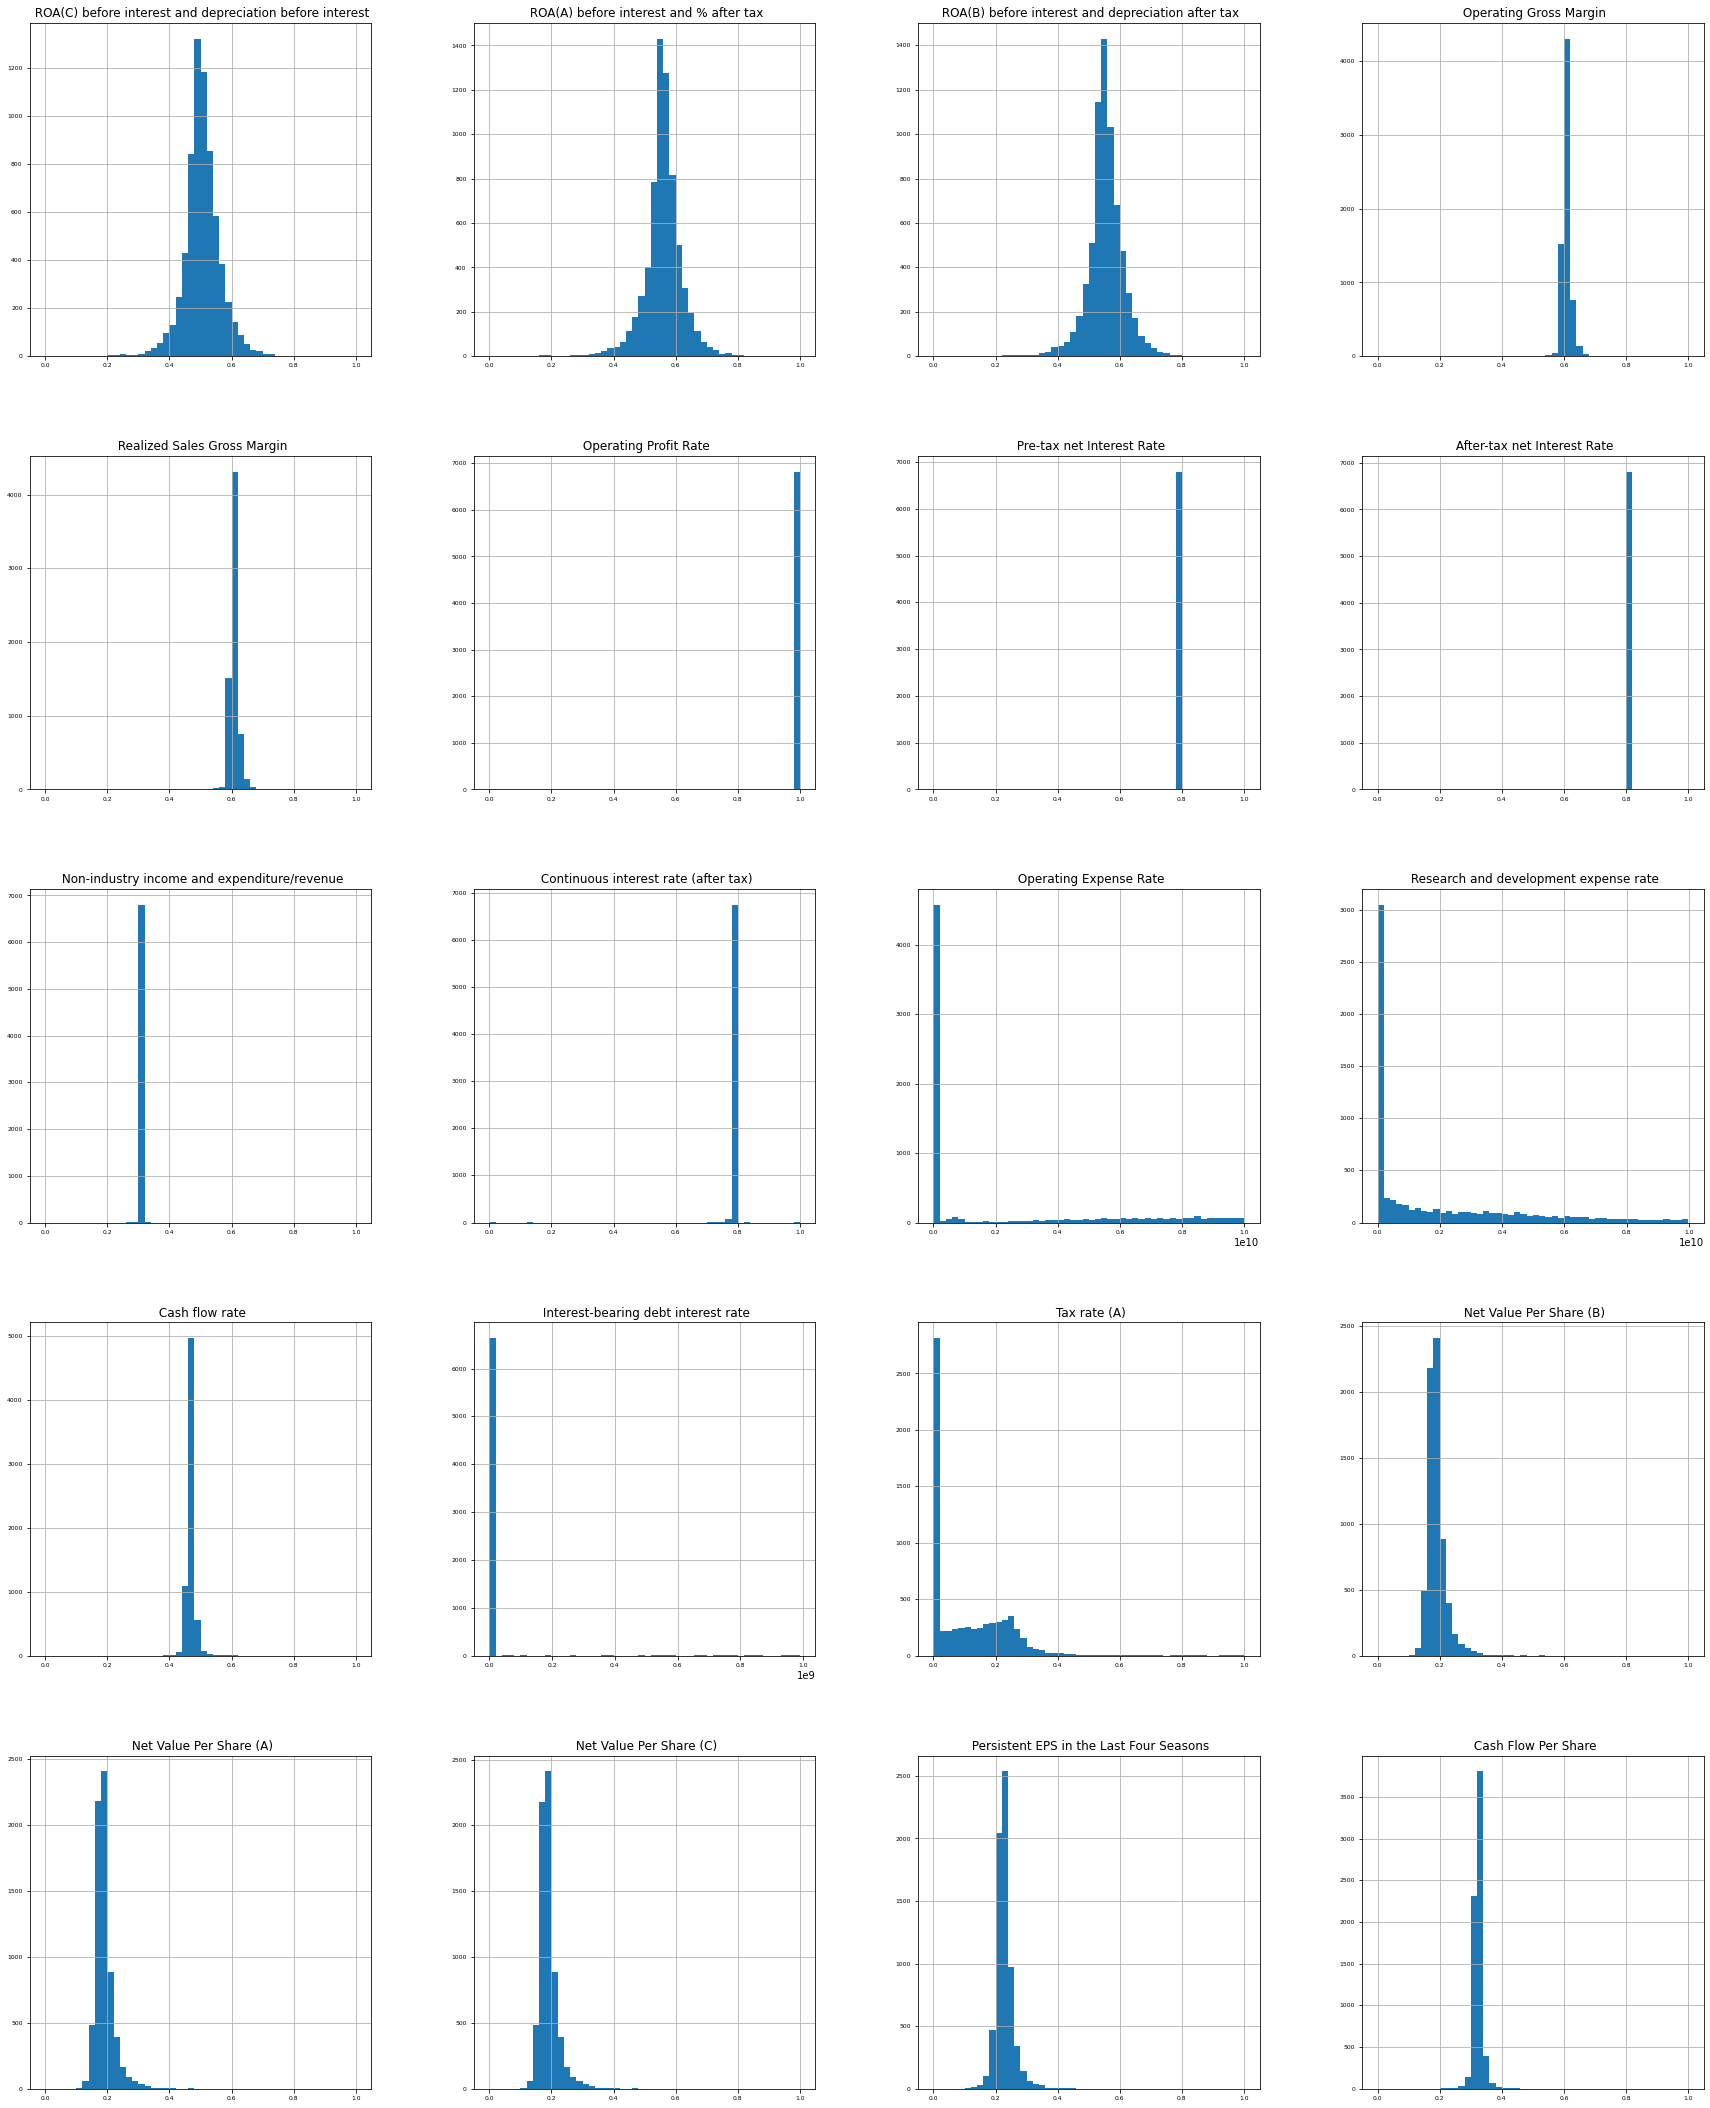

In [17]:
X20.hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

In [18]:
norm = [0,1,2]
nonnorm = []

In [19]:
X[X.columns[norm]]

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  
0                                              0.405750   
1                                              0.516730   
2                                              0.472295   
3                                              0.457733   
4                                              0.522298   
...                                                 ...   
6814                                           0.543230   
6815                                           0.524172   
6816                                           0.520638   
6817                                           0.554045   
6818                                           0.549548   

[6819 rows x 3 columns]

Normale : 0,1,2,3,4,12,15?16?,17?,18?,19?

Autres : 5,6,7,8,9,10,11,13,14


Groupes similaires : 0-1-2, 3-4-12-19, 5-6-7-8-9, 10-11-13, 15-18

Remarques :

array([[<AxesSubplot:title={'center':' Revenue Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Operating Profit Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Per Share Net profit before tax (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Profit Growth Rate'}>],
       [<AxesSubplot:title={'center':' Operating Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' After-tax Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Regular Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Continuous Net Profit Growth Rate'}>],
       [<AxesSubplot:title={'center':' Total Asset Growth Rate'}>,
        <AxesSubplot:title={'center':' Net Value Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Return Growth Rate Ratio'}>,
        <AxesSubplot:title={'center':' Cash Reinvestment %'}>],
       [<AxesSubplot:title={'center':' Current Ratio'}>,
        <AxesSubplot:title={'center':' Quick Ratio

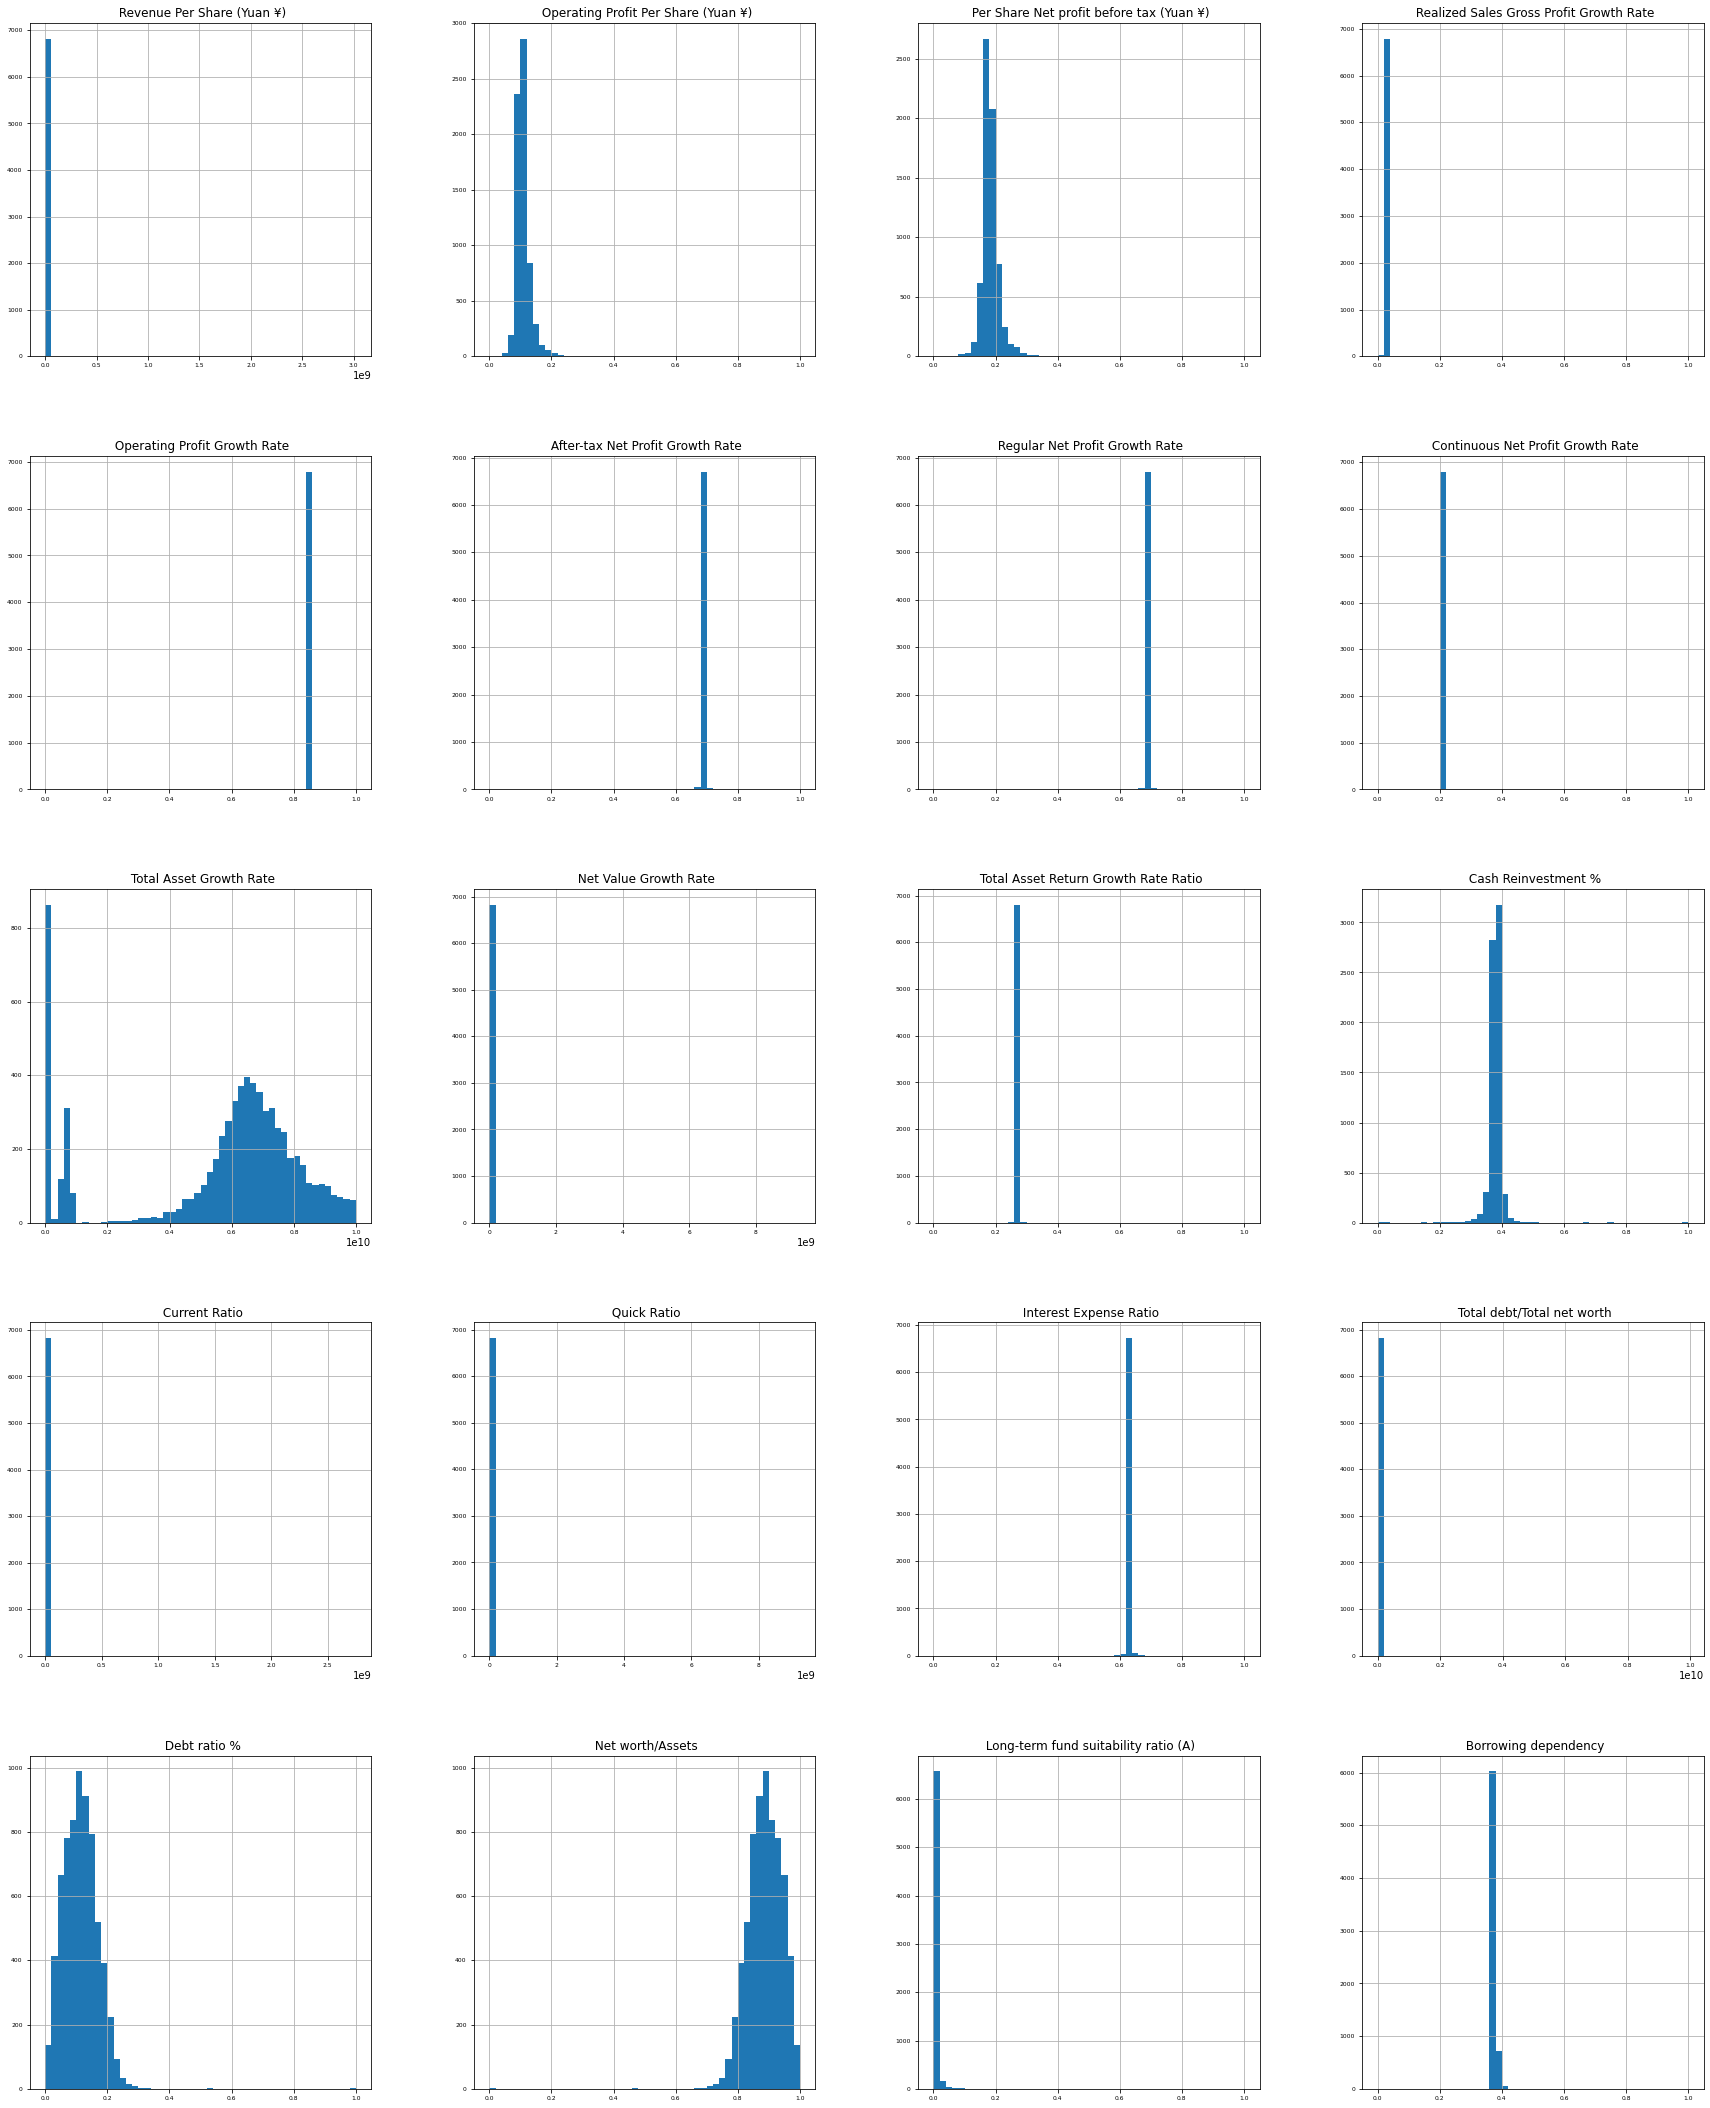

In [20]:
X40.hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

Normale : 0,1,2,3,4,12,15?16?,17?,18?,19?
Autres : 5,6,7,8,9,10,11,13,14

Groupes similaires : 0-1-2, 3-4-12-19, 5-6-7-8-9, 10-11-13, 15-18
Remarques :

array([[<AxesSubplot:title={'center':' Contingent liabilities/Net worth'}>,
        <AxesSubplot:title={'center':' Operating profit/Paid-in capital'}>,
        <AxesSubplot:title={'center':' Net profit before tax/Paid-in capital'}>,
        <AxesSubplot:title={'center':' Inventory and accounts receivable/Net value'}>],
       [<AxesSubplot:title={'center':' Total Asset Turnover'}>,
        <AxesSubplot:title={'center':' Accounts Receivable Turnover'}>,
        <AxesSubplot:title={'center':' Average Collection Days'}>,
        <AxesSubplot:title={'center':' Inventory Turnover Rate (times)'}>],
       [<AxesSubplot:title={'center':' Fixed Assets Turnover Frequency'}>,
        <AxesSubplot:title={'center':' Net Worth Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Revenue per person'}>,
        <AxesSubplot:title={'center':' Operating profit per person'}>],
       [<AxesSubplot:title={'center':' Allocation rate per person'}>,
        <AxesSubplot:title={'center':' Working

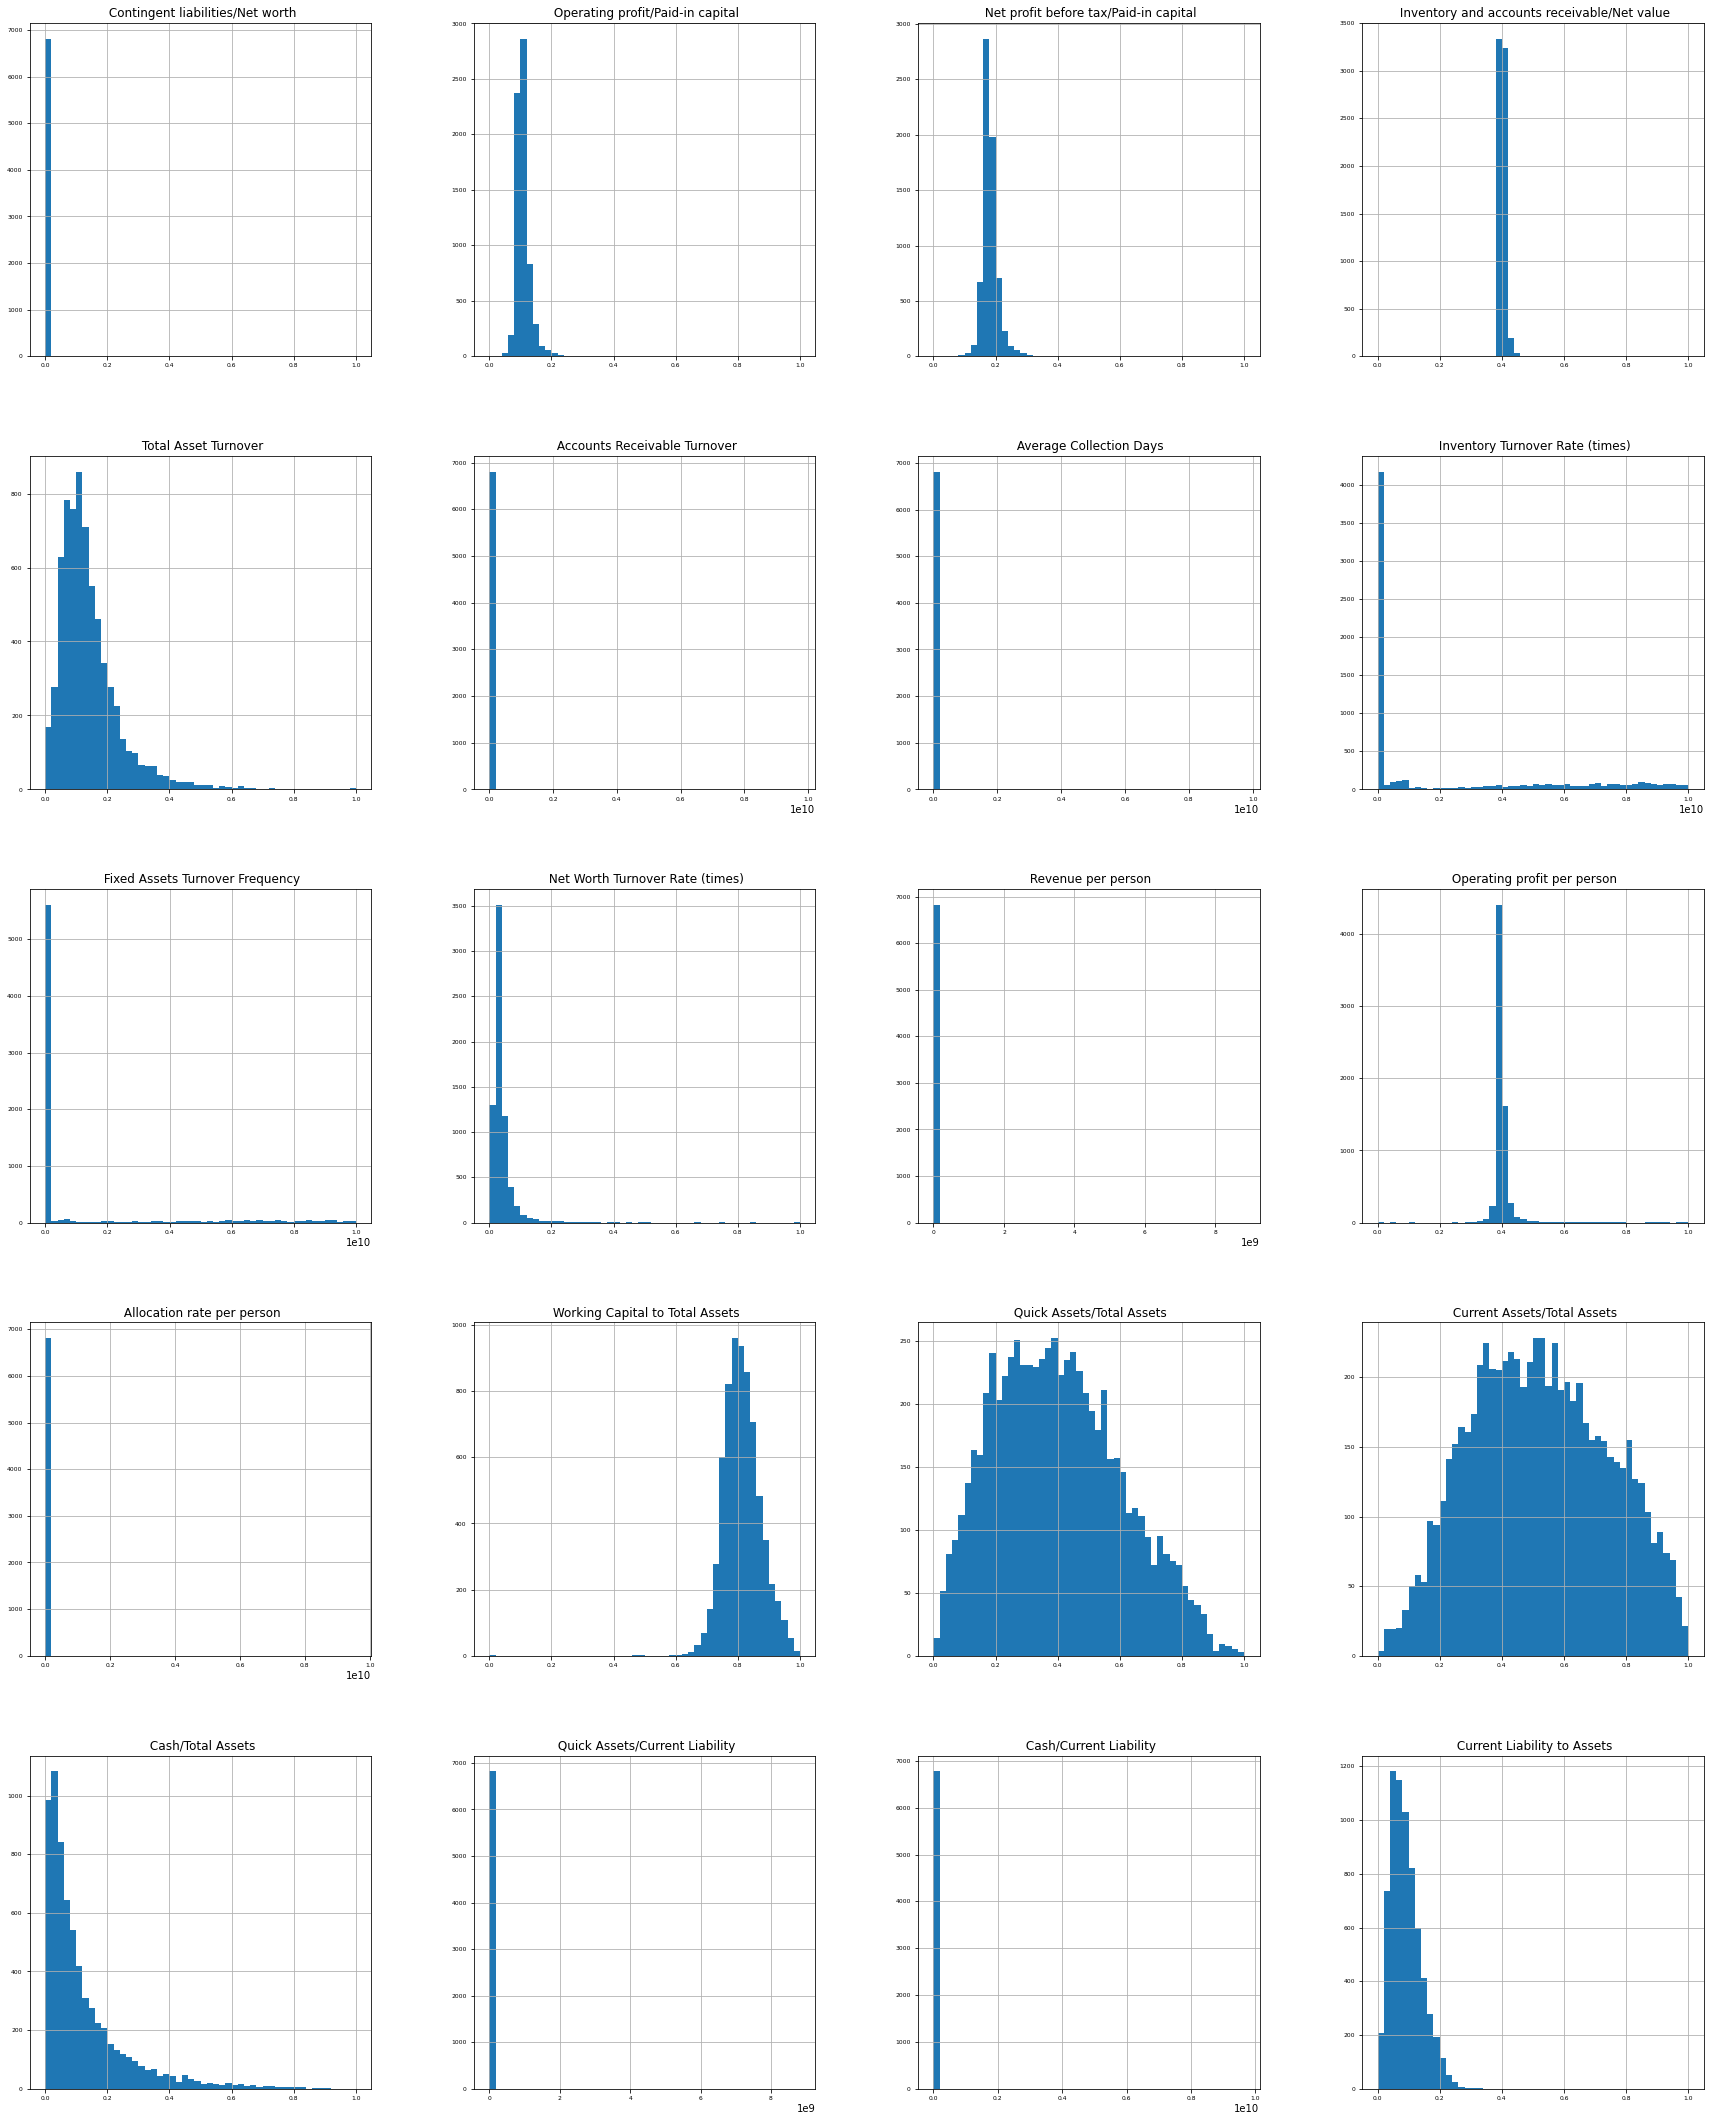

In [21]:
X60.hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

array([[<AxesSubplot:title={'center':' Operating Funds to Liability'}>,
        <AxesSubplot:title={'center':' Inventory/Working Capital'}>,
        <AxesSubplot:title={'center':' Inventory/Current Liability'}>,
        <AxesSubplot:title={'center':' Current Liabilities/Liability'}>],
       [<AxesSubplot:title={'center':' Working Capital/Equity'}>,
        <AxesSubplot:title={'center':' Current Liabilities/Equity'}>,
        <AxesSubplot:title={'center':' Long-term Liability to Current Assets'}>,
        <AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>],
       [<AxesSubplot:title={'center':' Total income/Total expense'}>,
        <AxesSubplot:title={'center':' Total expense/Assets'}>,
        <AxesSubplot:title={'center':' Current Asset Turnover Rate'}>,
        <AxesSubplot:title={'center':' Quick Asset Turnover Rate'}>],
       [<AxesSubplot:title={'center':' Working capitcal Turnover Rate'}>,
        <AxesSubplot:title={'center':' Cash Turnover Rate'}>,
        

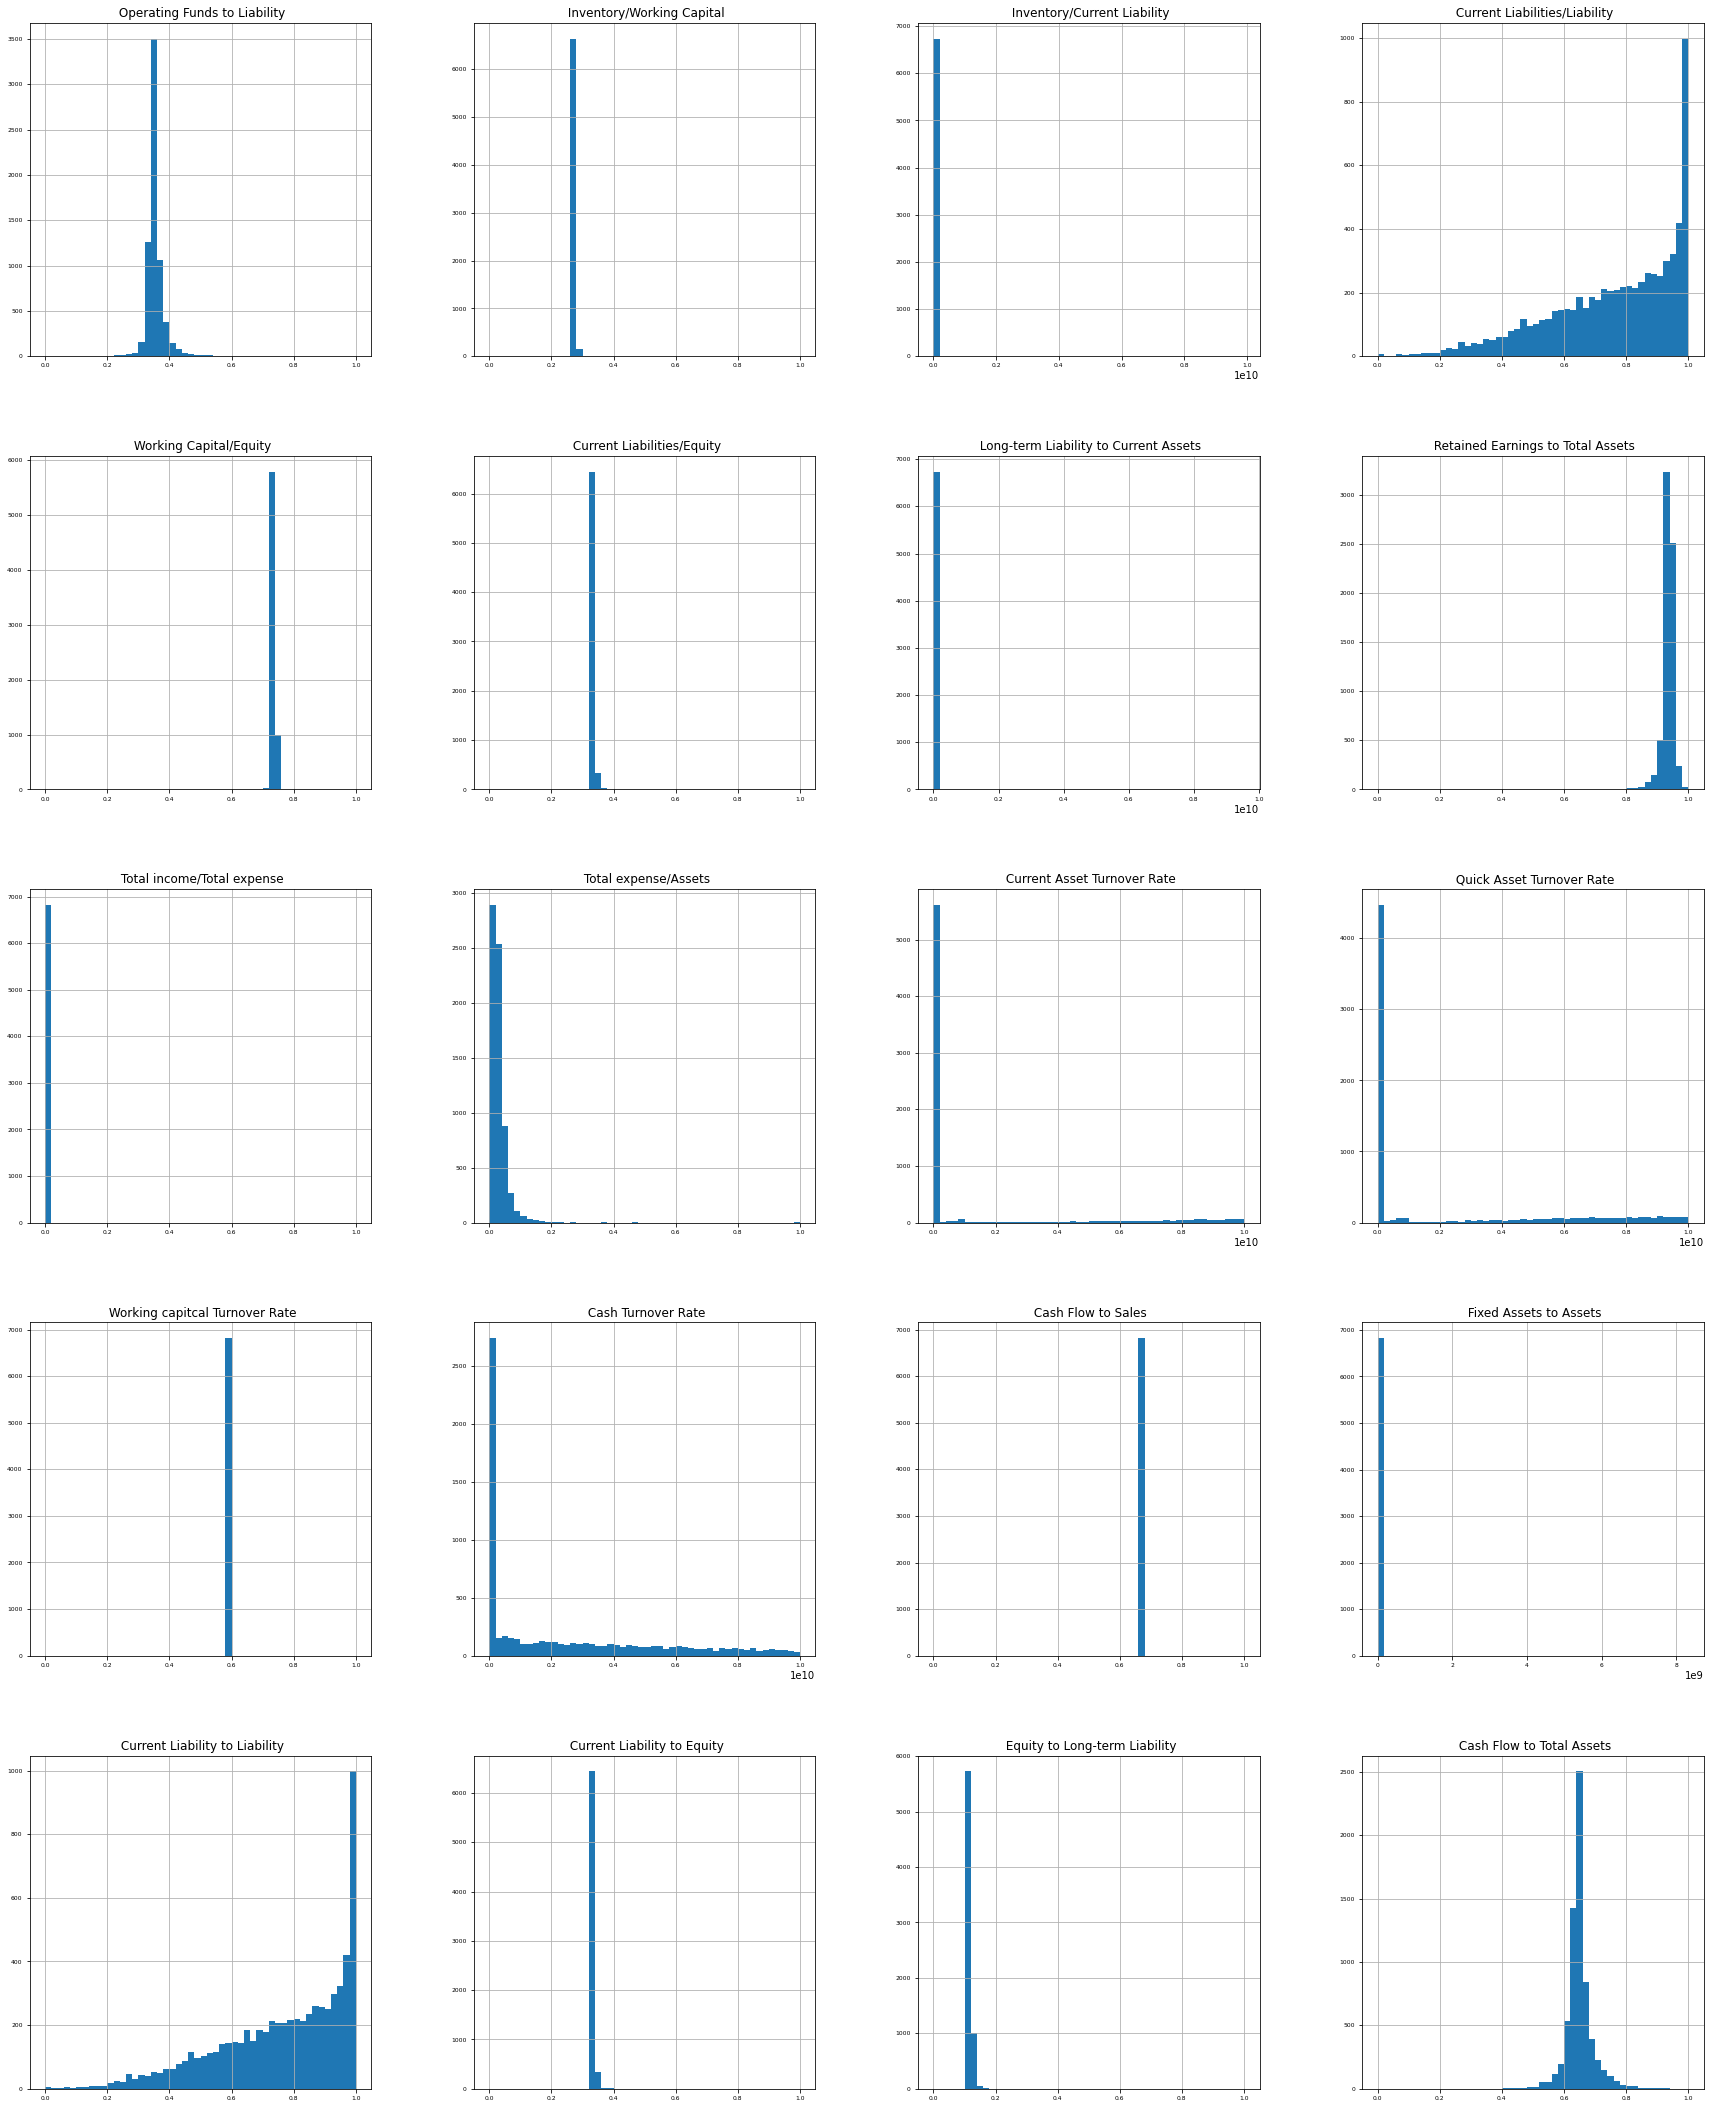

In [22]:
X80.hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

array([[<AxesSubplot:title={'center':' Cash Flow to Liability'}>,
        <AxesSubplot:title={'center':' CFO to Assets'}>,
        <AxesSubplot:title={'center':' Cash Flow to Equity'}>,
        <AxesSubplot:title={'center':' Current Liability to Current Assets'}>],
       [<AxesSubplot:title={'center':' Liability-Assets Flag'}>,
        <AxesSubplot:title={'center':' Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':' Total assets to GNP price'}>,
        <AxesSubplot:title={'center':' No-credit Interval'}>],
       [<AxesSubplot:title={'center':' Gross Profit to Sales'}>,
        <AxesSubplot:title={'center':" Net Income to Stockholder's Equity"}>,
        <AxesSubplot:title={'center':' Liability to Equity'}>,
        <AxesSubplot:title={'center':' Degree of Financial Leverage (DFL)'}>],
       [<AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSubplot:title={'center':' Equity to Liability'}>,
        <AxesSubplot:>, <

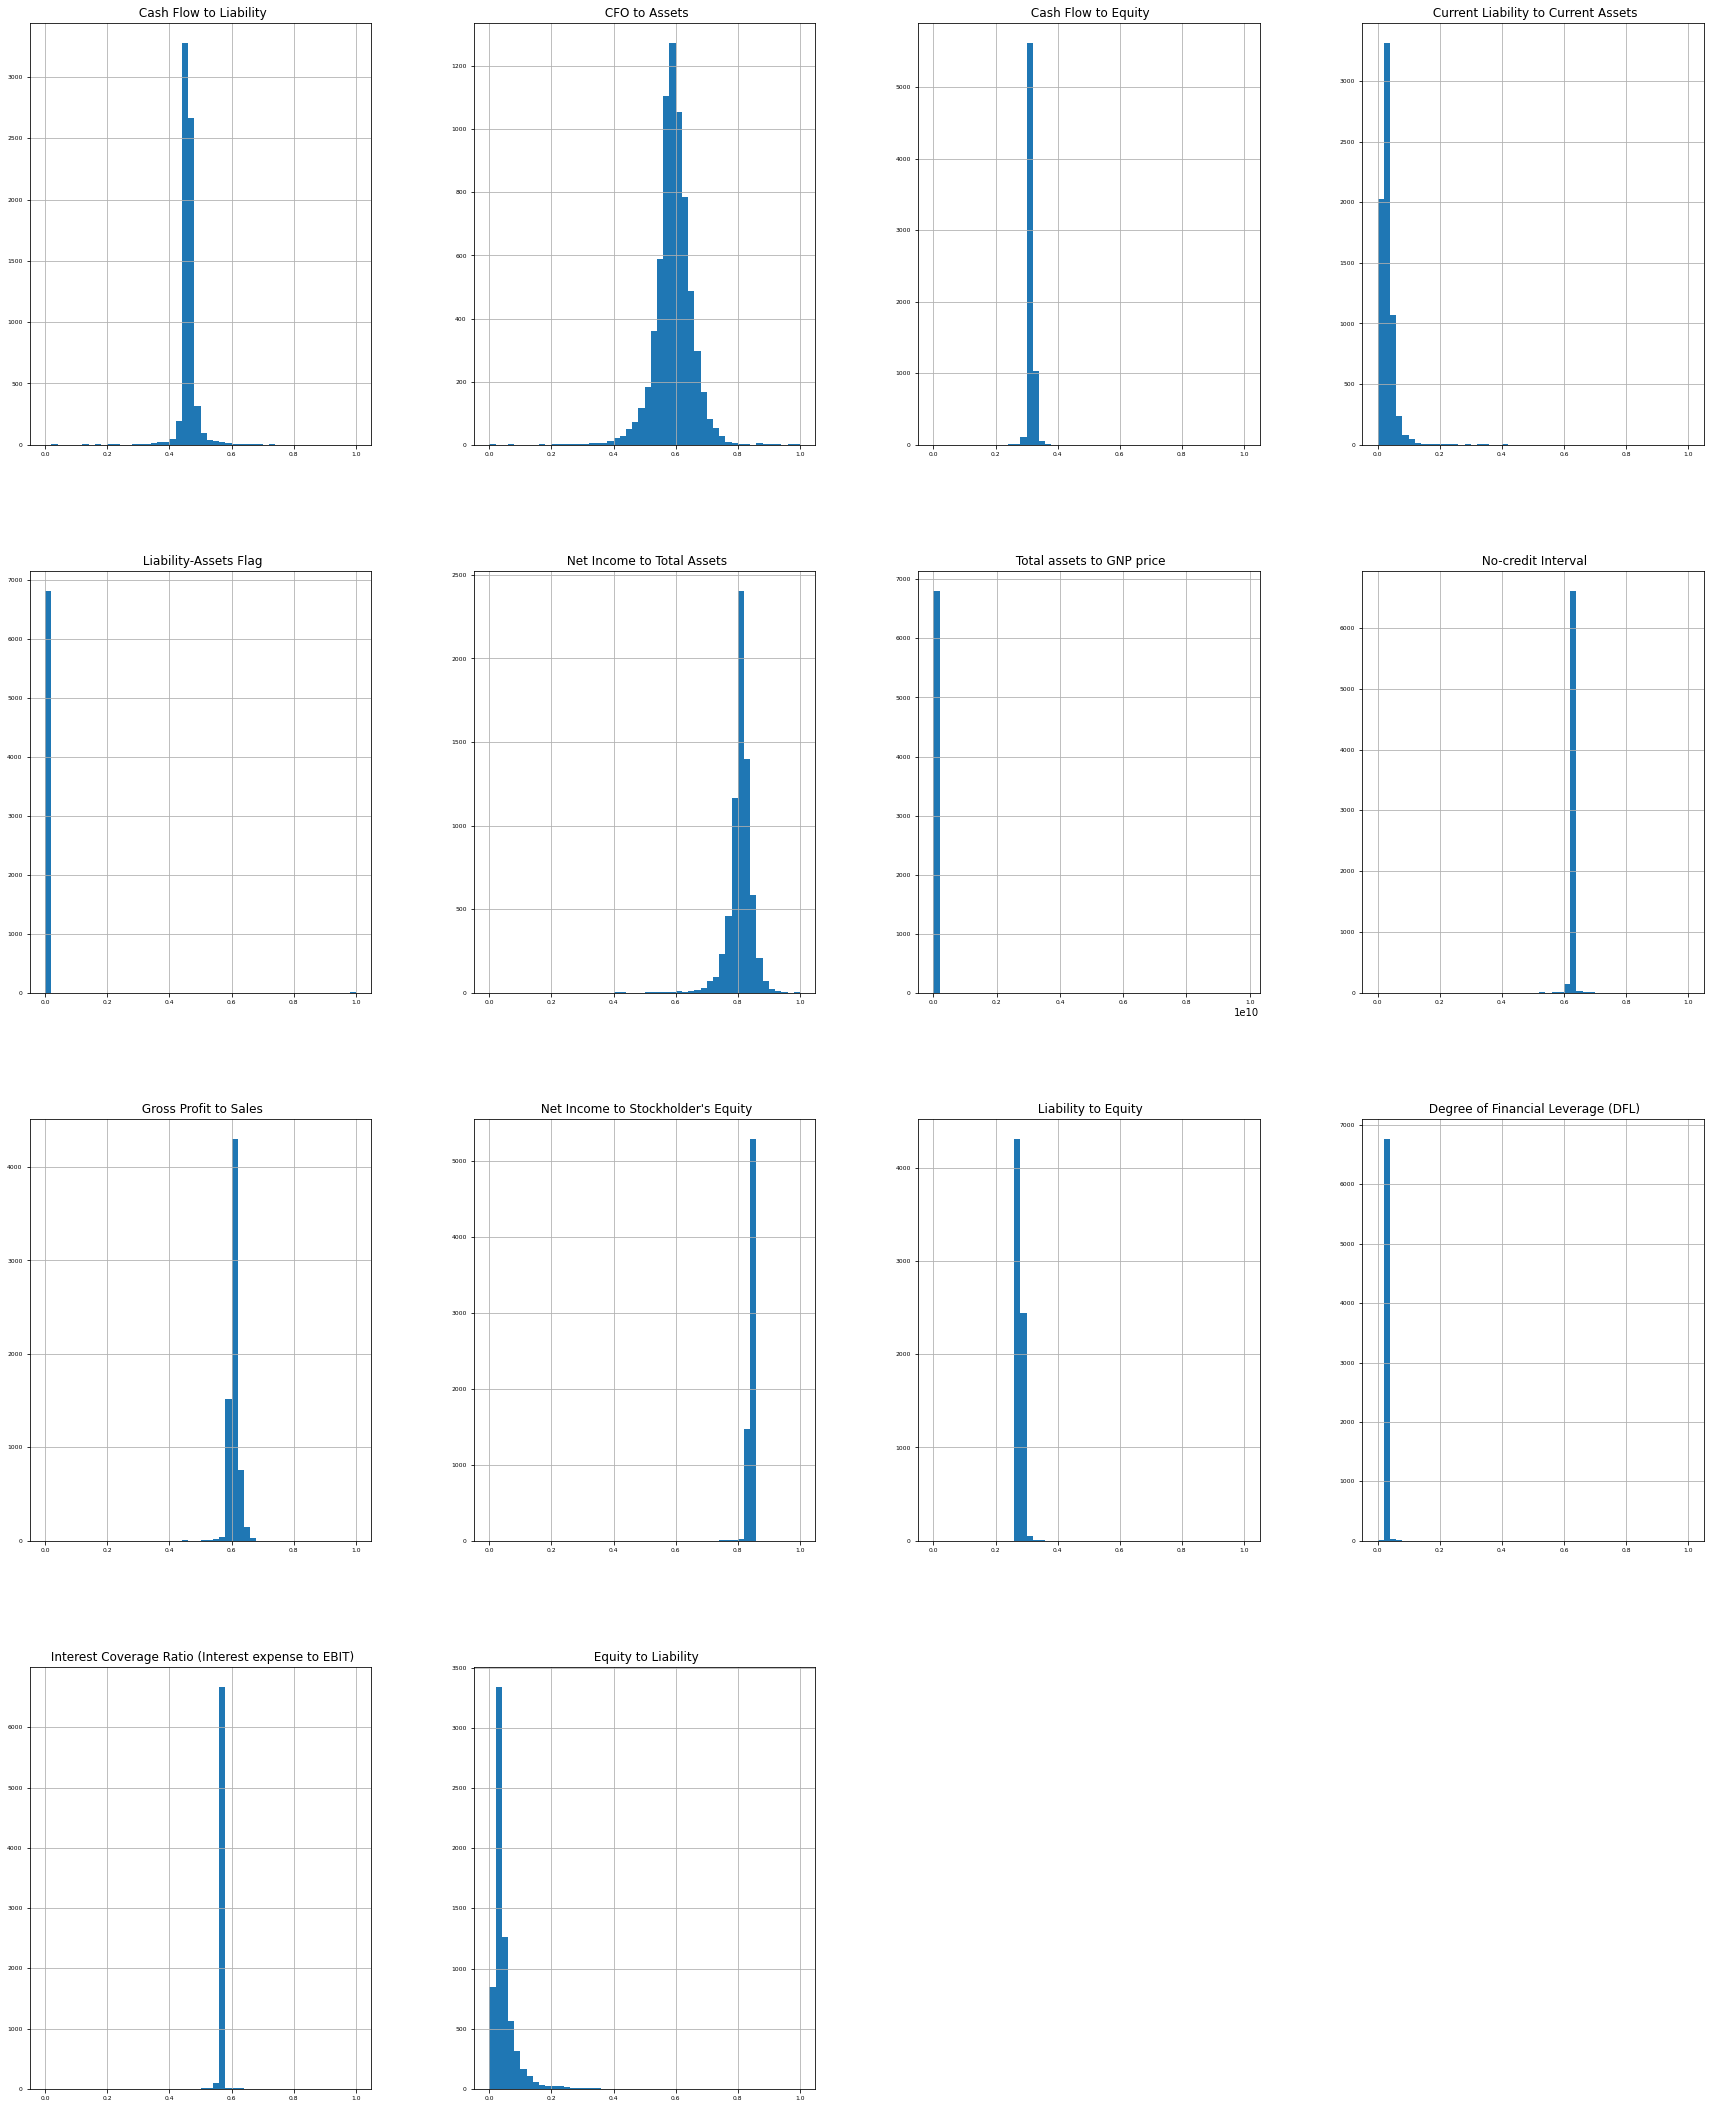

In [23]:
X95.hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

In [24]:
len(df.columns)

95

In [25]:
# from scipy.stats import shapiro
# for c in range (0,95):
#     print(f'{c} : {shapiro(df.iloc[:, c])}')

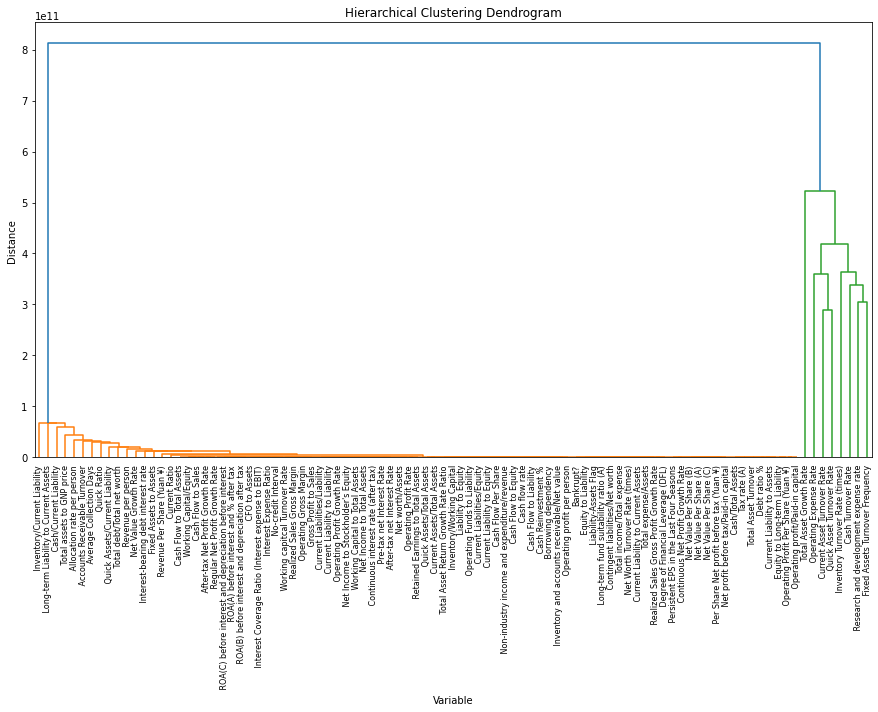

In [26]:
# Stratégie utilisée pour aider à l'interprétation du plan principal 
# lorsque le nombre de variables est important
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df.T, 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
dendrogram(Z,leaf_font_size=8.,labels=df.columns)
plt.show()

In [27]:
# from scipy.stats import kstest, norm
# for col in X.columns:
#     ks_statistic, p_value = kstest(X[col], 'norm')
#     print(ks_statistic, p_value)

In [28]:
a = X[X[" ROA(C) before interest and depreciation before interest"] < X[' ROA(C) before interest and depreciation before interest'].quantile(0.99)]

In [29]:
a

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818    

In [30]:
# X[X<X.quantile(0.99)]

In [31]:
X_freeoutliers = pd.DataFrame(X[X<X.quantile(0.99)]).dropna(axis=0)

In [32]:
from statsmodels.stats.diagnostic import lilliefors
for col in X.columns:
    lillie = lilliefors(X[col])
#     print(lillie[0])
    print(X[col].name,lillie)

 ROA(C) before interest and depreciation before interest (0.0810473201195086, 0.0009999999999998899)
 ROA(A) before interest and % after tax (0.12162150105675099, 0.0009999999999998899)
 ROA(B) before interest and depreciation after tax (0.09635637332864766, 0.0009999999999998899)
 Operating Gross Margin (0.15986041261955997, 0.0009999999999998899)
 Realized Sales Gross Margin (0.16022268754870983, 0.0009999999999998899)
 Operating Profit Rate (0.4733379450422175, 0.0009999999999998899)
 Pre-tax net Interest Rate (0.46079666936176933, 0.0009999999999998899)
 After-tax net Interest Rate (0.46417501817862095, 0.0009999999999998899)
 Non-industry income and expenditure/revenue (0.459155772704147, 0.0009999999999998899)
 Continuous interest rate (after tax) (0.46247773590665897, 0.0009999999999998899)
 Operating Expense Rate (0.39721345602559155, 0.0009999999999998899)
 Research and development expense rate (0.22642937277432978, 0.0009999999999998899)
 Cash flow rate (0.1879259994226367, 0

In [33]:
norm_lillie=[]
nonnorm_lillie=[]
for col in X.columns:
    lillie = lilliefors(X[col])
    if lillie[0] < 0.16:
        norm_lillie.append(col)
    else:
        nonnorm_lillie.append(col)

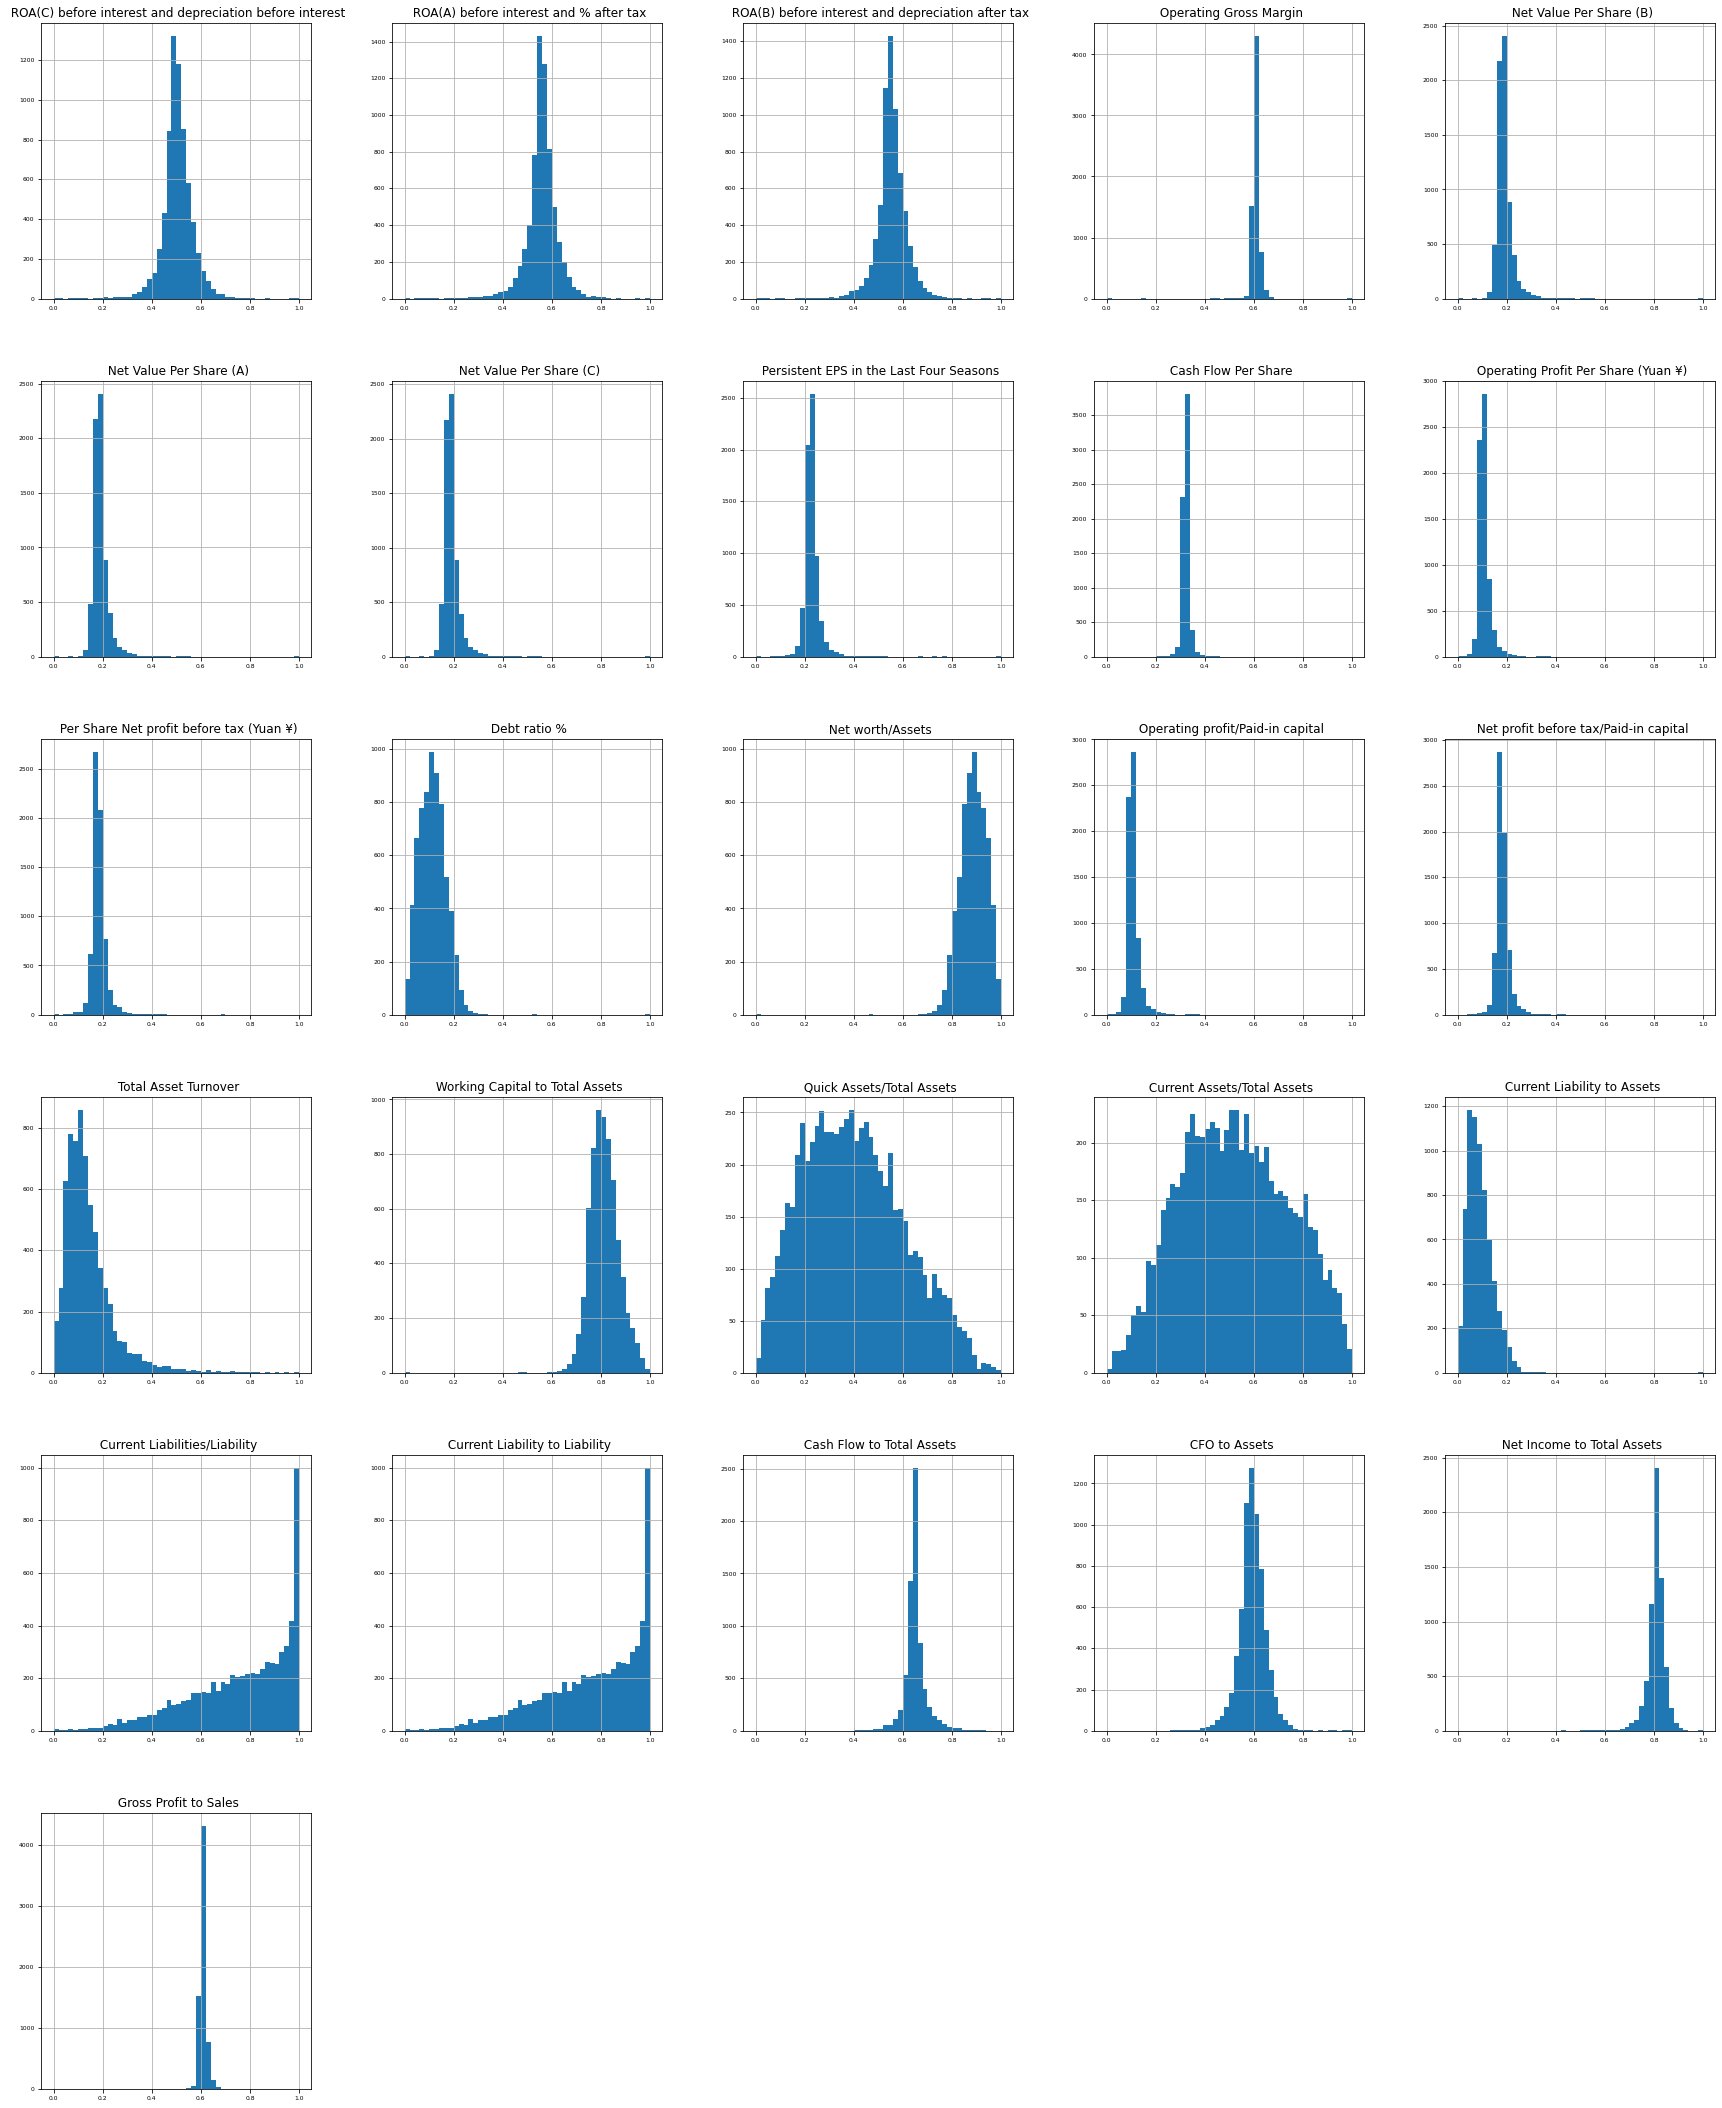

In [34]:
X[norm_lillie].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

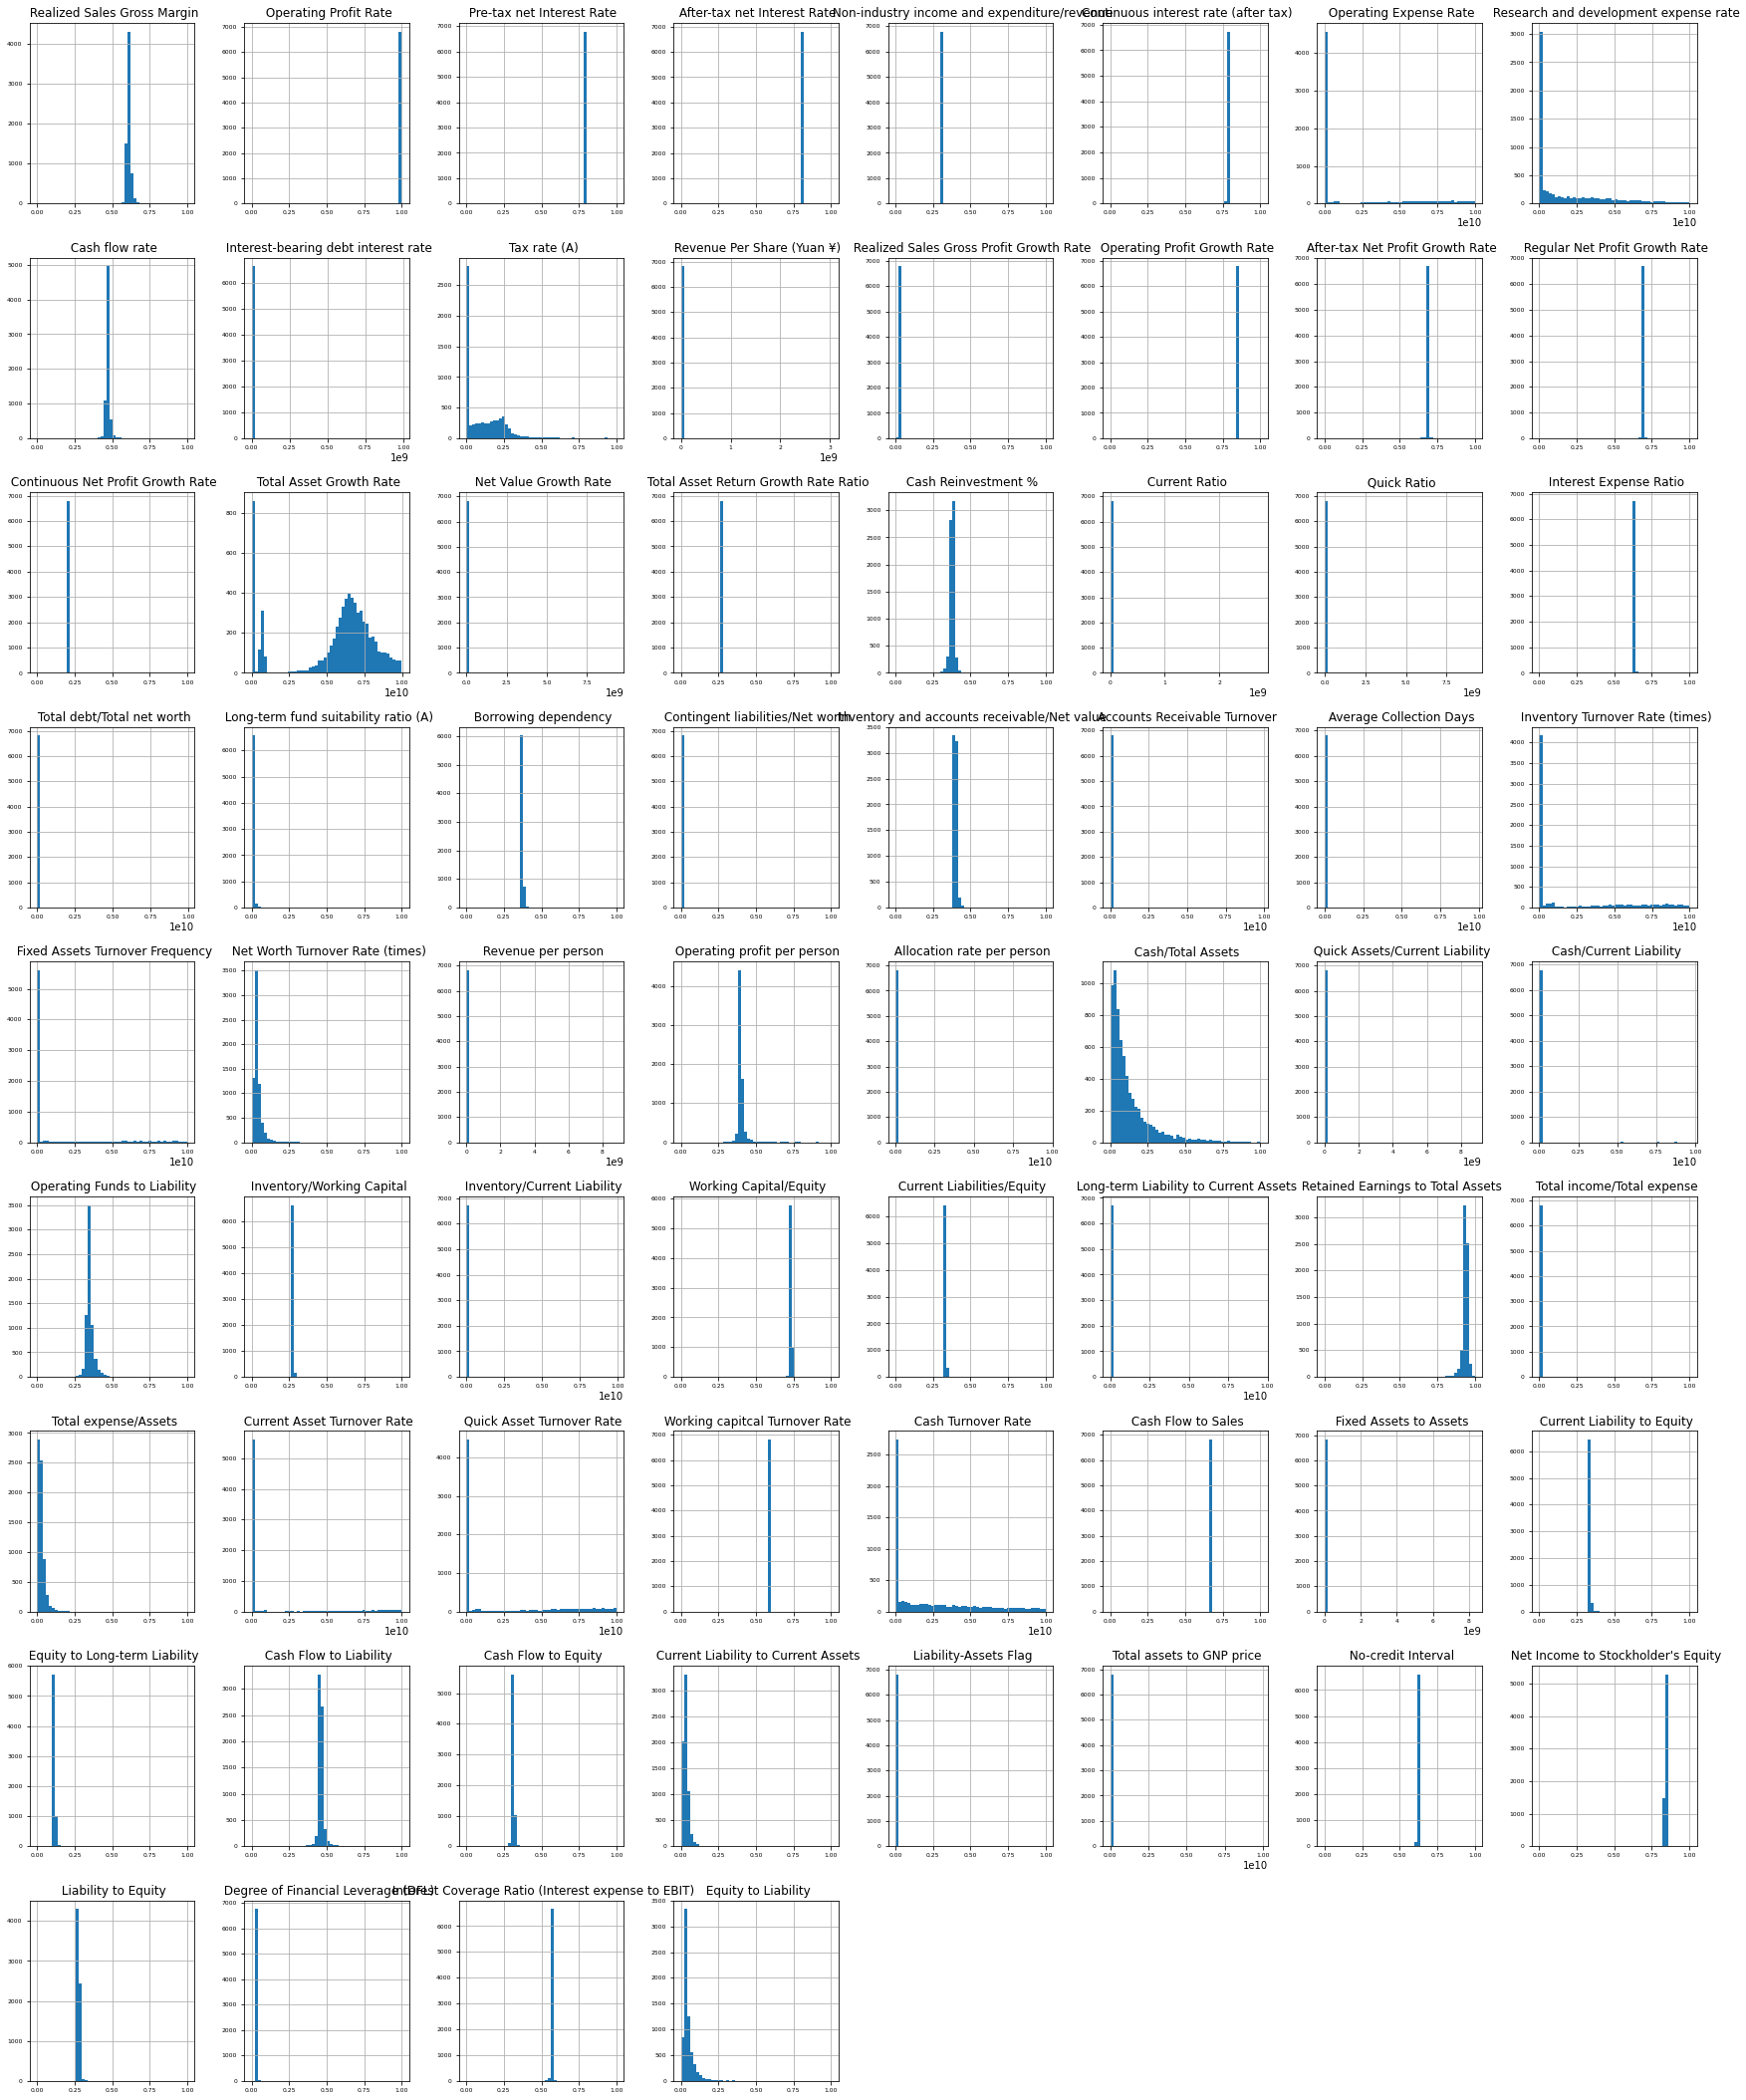

In [35]:
X[nonnorm_lillie].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

In [36]:
from statsmodels.graphics.gofplots import qqplot
import pylab

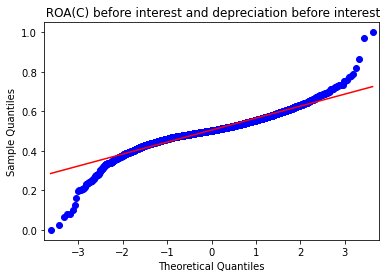

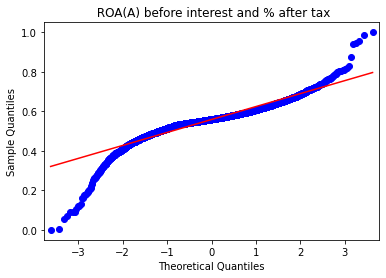

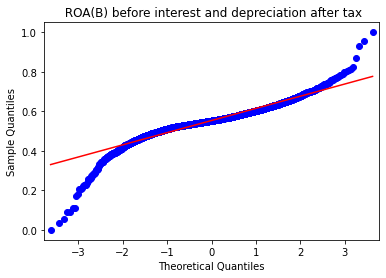

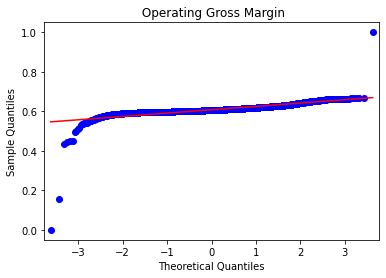

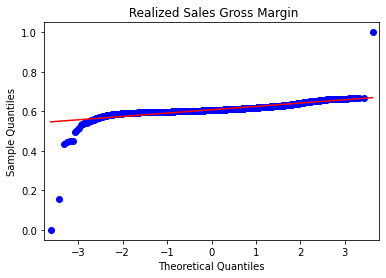

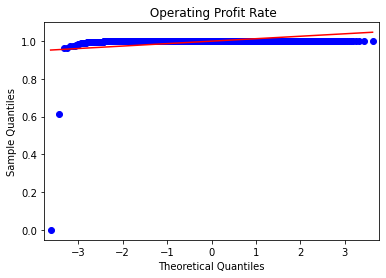

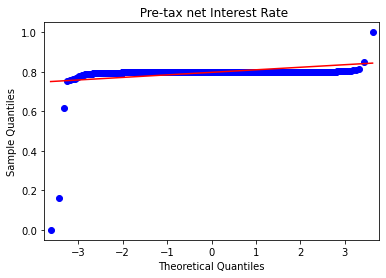

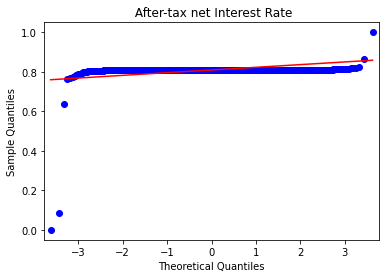

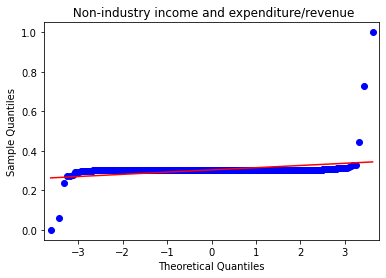

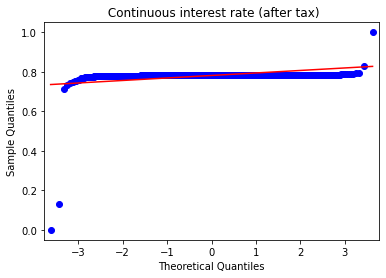

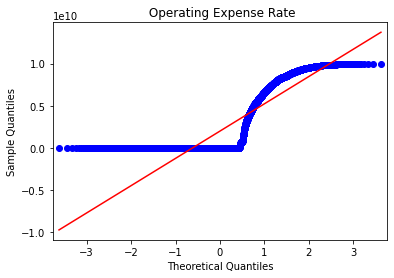

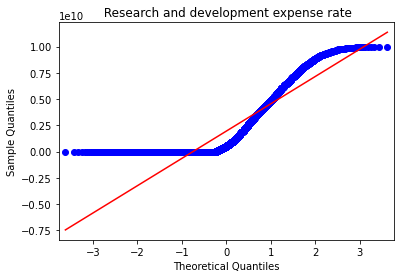

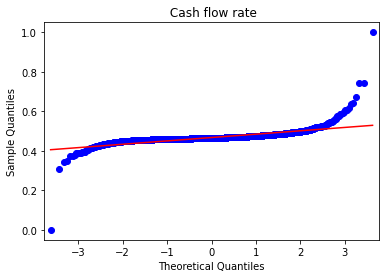

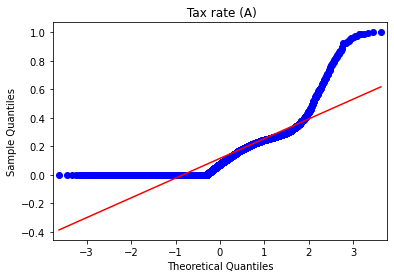

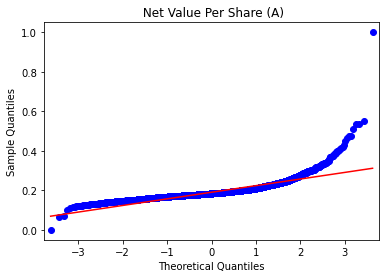

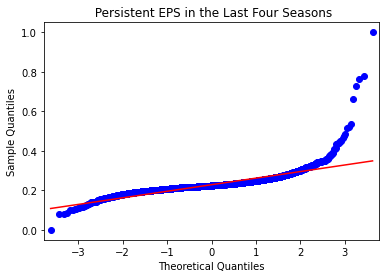

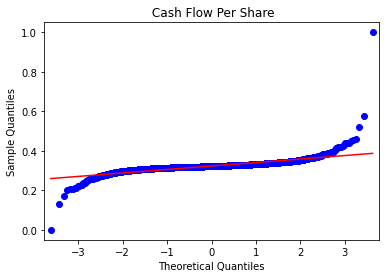

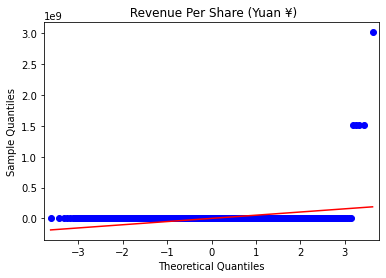

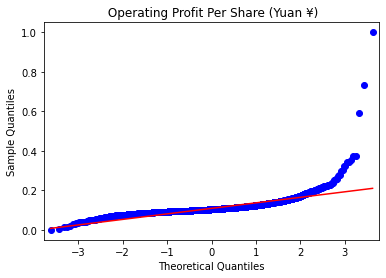

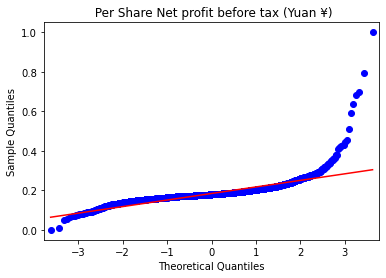

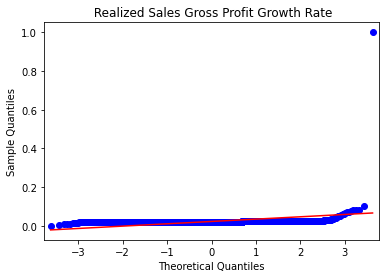

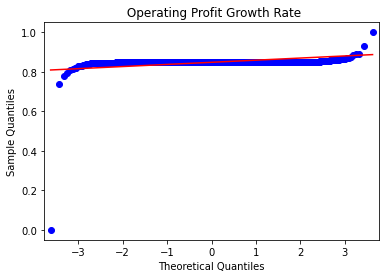

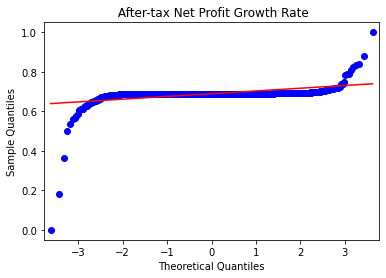

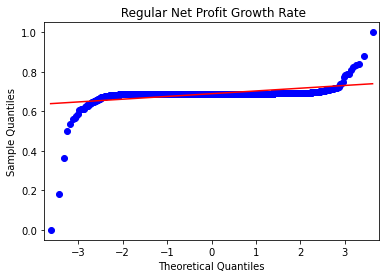

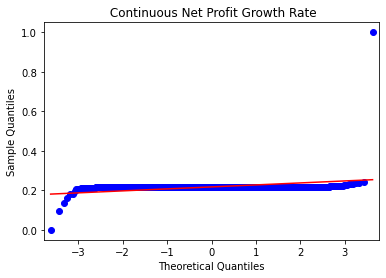

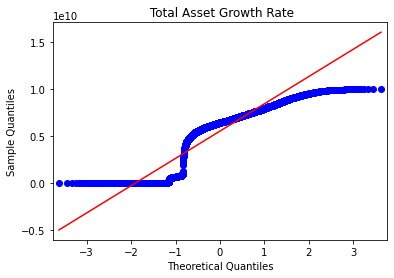

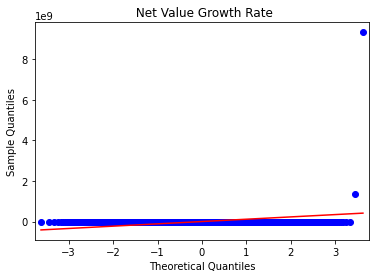

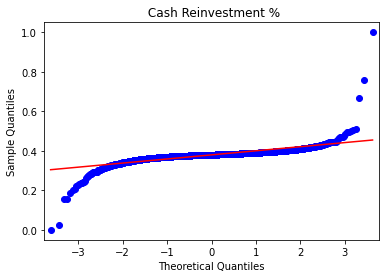

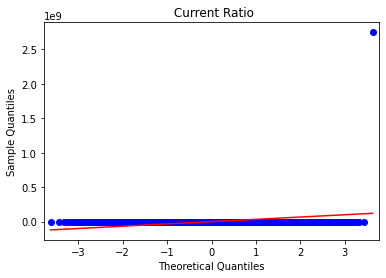

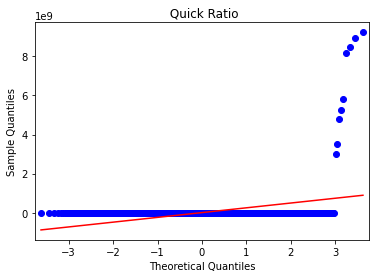

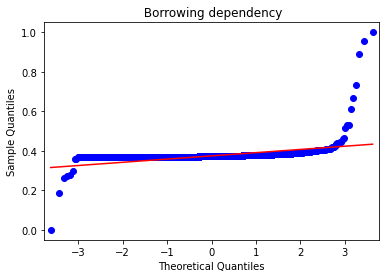

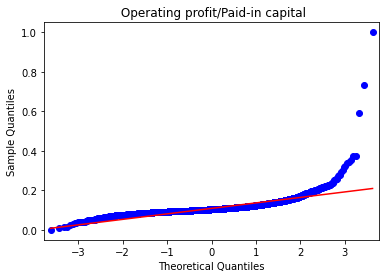

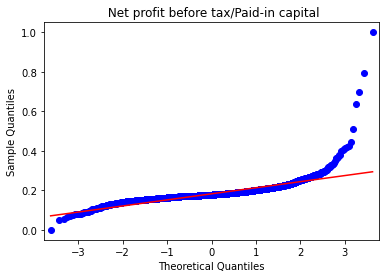

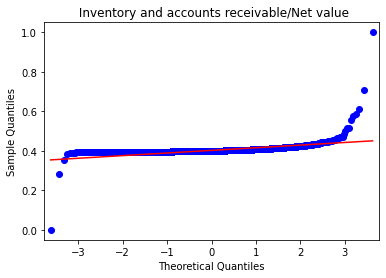

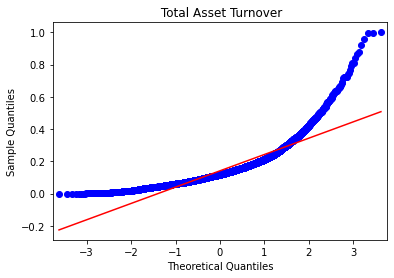

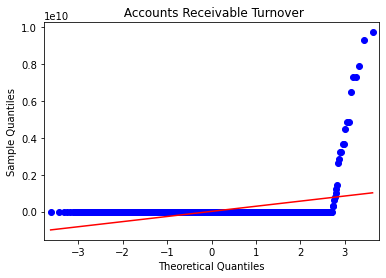

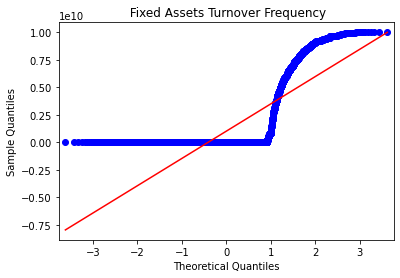

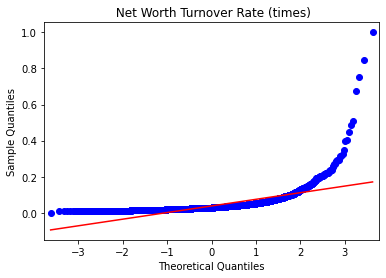

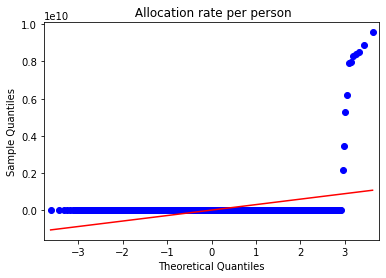

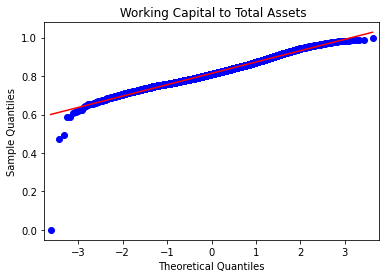

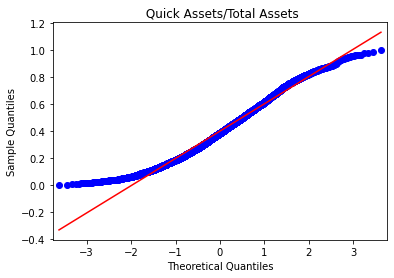

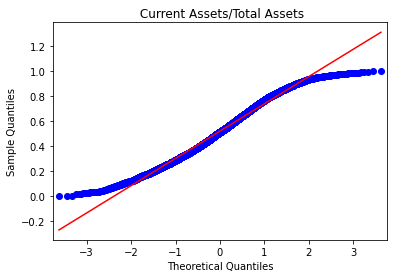

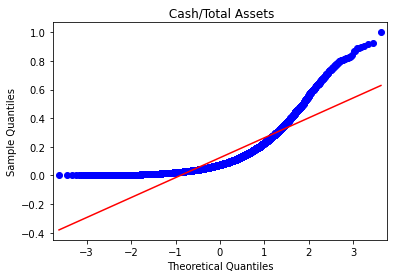

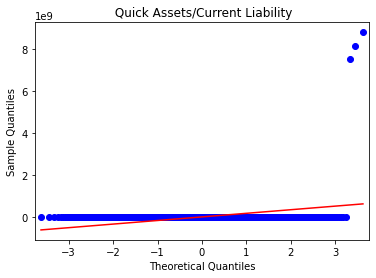

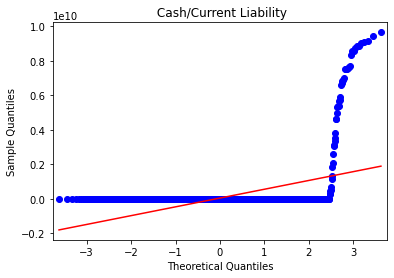

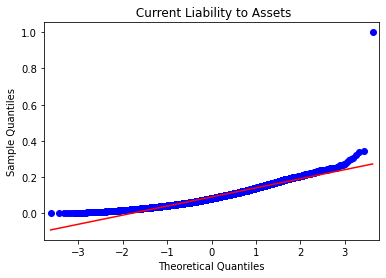

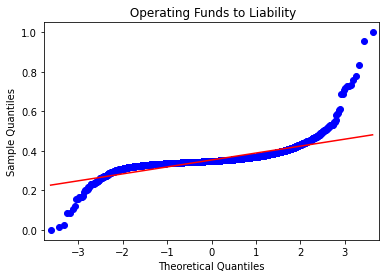

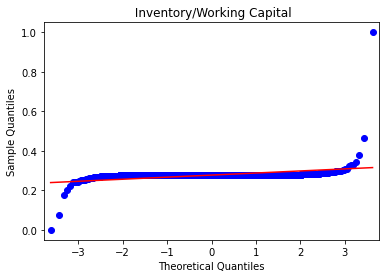

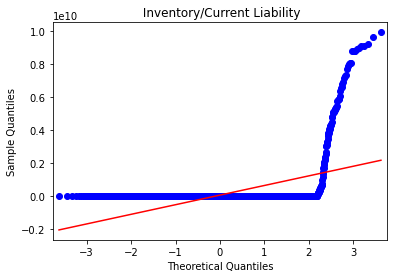

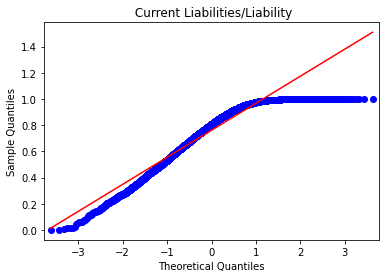

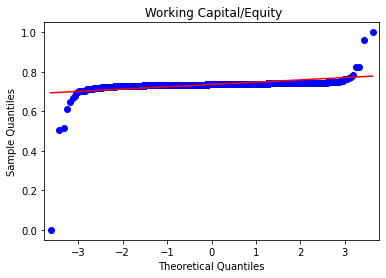

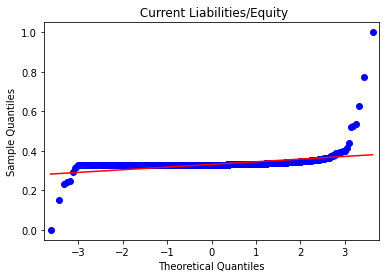

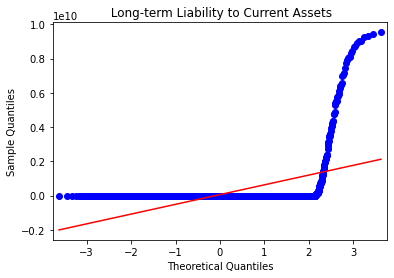

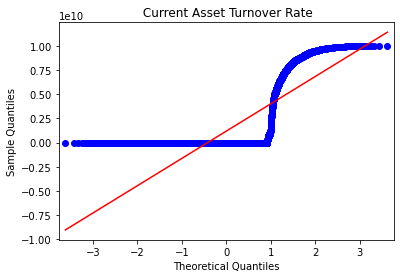

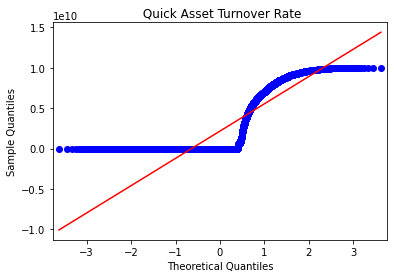

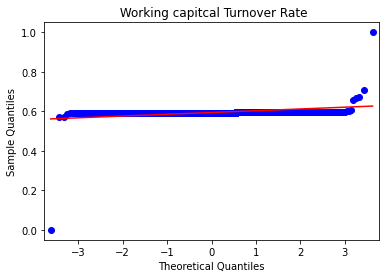

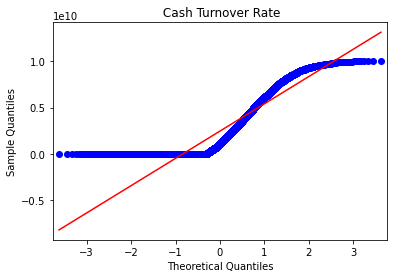

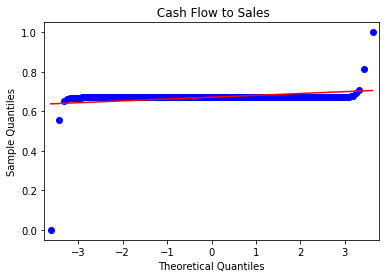

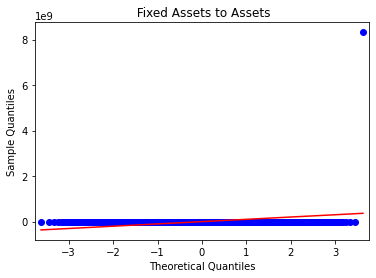

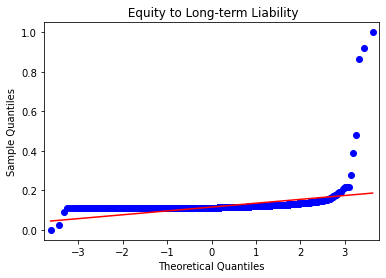

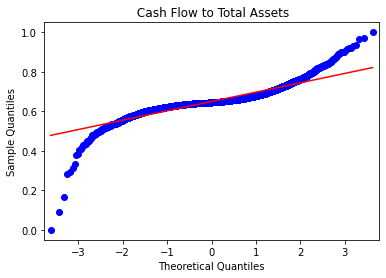

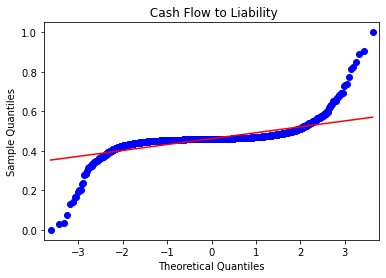

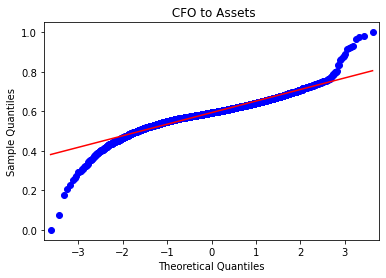

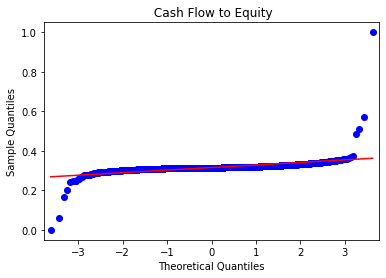

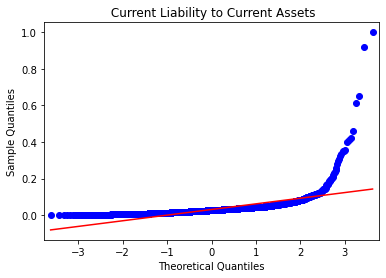

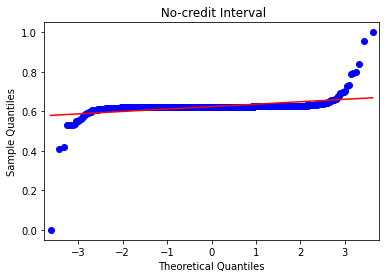

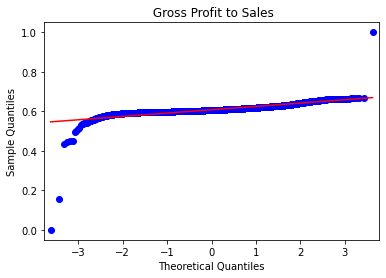

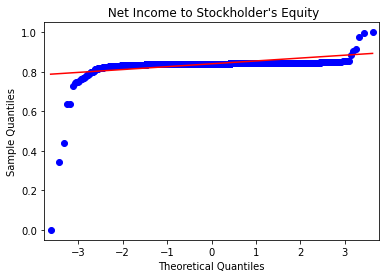

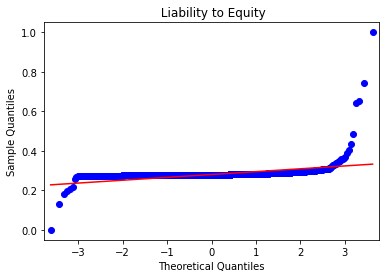

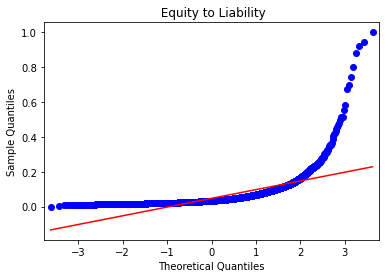

In [37]:
for col in X.columns:
#     pylab.figure(figsize=(3,32))
    qqplot(X[col],line="s")
    pylab.title(X[col].name)
    pylab.show()

In [38]:
from distfit import distfit

In [39]:
# Initialize model
distfit = distfit(bins=25,alpha=0.02,stats='ks')

In [40]:
# Fit
distfit.fit_transform(X[" Cash Flow to Total Assets"],verbose=1)
distfit.plot(verbose=1)
distfit.summary

distr     score  LLE               loc             scale  \
0     dweibull  0.148617  NaN          0.643427          0.024678   
1            t  0.807543  NaN          0.645518          0.017459   
2   genextreme  1.108472  NaN          0.630751          0.064891   
3        gamma  1.828622  NaN         -0.098341          0.003426   
4     loggamma  1.828622  NaN        -10.028819          1.535962   
5         norm  2.250696  NaN          0.649731          0.047369   
6      lognorm  2.250696  NaN        -16.310251         16.959968   
7         beta  2.250696  NaN         -8.419196         16.762936   
8        expon  5.801256  NaN               0.0          0.649731   
9       pareto  5.801256  NaN -260059185.879355  260059185.879355   
10     uniform   8.43846  NaN               0.0               1.0   

                                        arg  
0                     (0.8020649615781472,)  
1                      (1.506763539627775,)  
2                     (0.1751343950801732,)  
3                     (218.37853512152674,)  
4                      (1046.087111941589,)  
5                                        ()  
6                   (0.002796677668383713,)  
7   (16822.21278010869, 14271.968182816447)  
8                                        ()  
9                      (393137215.5730504,)  
10                                       ()

In [41]:
distfit.summary [["distr","score"]].iloc[0]

distr    dweibull
score    0.148617
Name: 0, dtype: object

In [42]:
distfit.model

{'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x23f31139d30>,
 'stats': 'ks',
 'params': (0.8020649615781472, 0.6434274656601882, 0.024678105180722033),
 'name': 'dweibull',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x23f563a6f10>,
 'score': 0.14861694733027922,
 'loc': 0.6434274656601882,
 'scale': 0.024678105180722033,
 'arg': (0.8020649615781472,),
 'CII_min_alpha': 0.5374268962189696,
 'CII_max_alpha': 0.7494280351014068}

In [43]:
norm_dist=[]
t_dist=[]
lognorm_dist=[]
other_dist =[]

# distfit = distfit(bins=25,alpha=0.02,stats='ks')

for col in X.columns:
    distfit.fit_transform(X[col], verbose=1)
    if distfit.model['name']=='t':
        t_dist.append([col, distfit.model['score']])
    elif distfit.model['name']=='norm':
        norm_dist.append([col, distfit.model['score']])
    elif distfit.model['name']=='lognorm':
        lognorm_dist.append([col, distfit.model['score']])
    else:
        other_dist.append([col, distfit.model['score'],distfit.model['name']])

In [44]:
# norm_dist={}
# t_dist={}
# lognorm_dist={}
# other_dist ={}

# # distfit = distfit(bins=25,alpha=0.02,stats='ks')

# for col in X.columns:
#     distfit.fit_transform(X[col], verbose=1)
#     if distfit.model['name']=='t':
#         t_dist["feature"] = col
#         t_dist["score"] = distfit.model['score']
#     elif distfit.model['name']=='norm':
#         norm_dist["feature"] = col
#         norm_dist["score"] = distfit.model['score']
#     elif distfit.model['name']=='lognorm':
#         lognorm_dist["feature"] = col
#         lognorm_dist["score"] = distfit.model['score']
#     else:
#         other_dist["feature"] = col
#         other_dist["score"] = distfit.model['score']
#         other_dist["name"] = distfit.model['name']

In [45]:
t_dist_df = pd.DataFrame(t_dist,columns=['feature','score'])
norm_dist_df = pd.DataFrame(norm_dist,columns=['feature','score'])
lognorm_dist_df = pd.DataFrame(lognorm_dist,columns=['feature','score'])
other_dist_df = pd.DataFrame(other_dist,columns=['feature','score','model'])

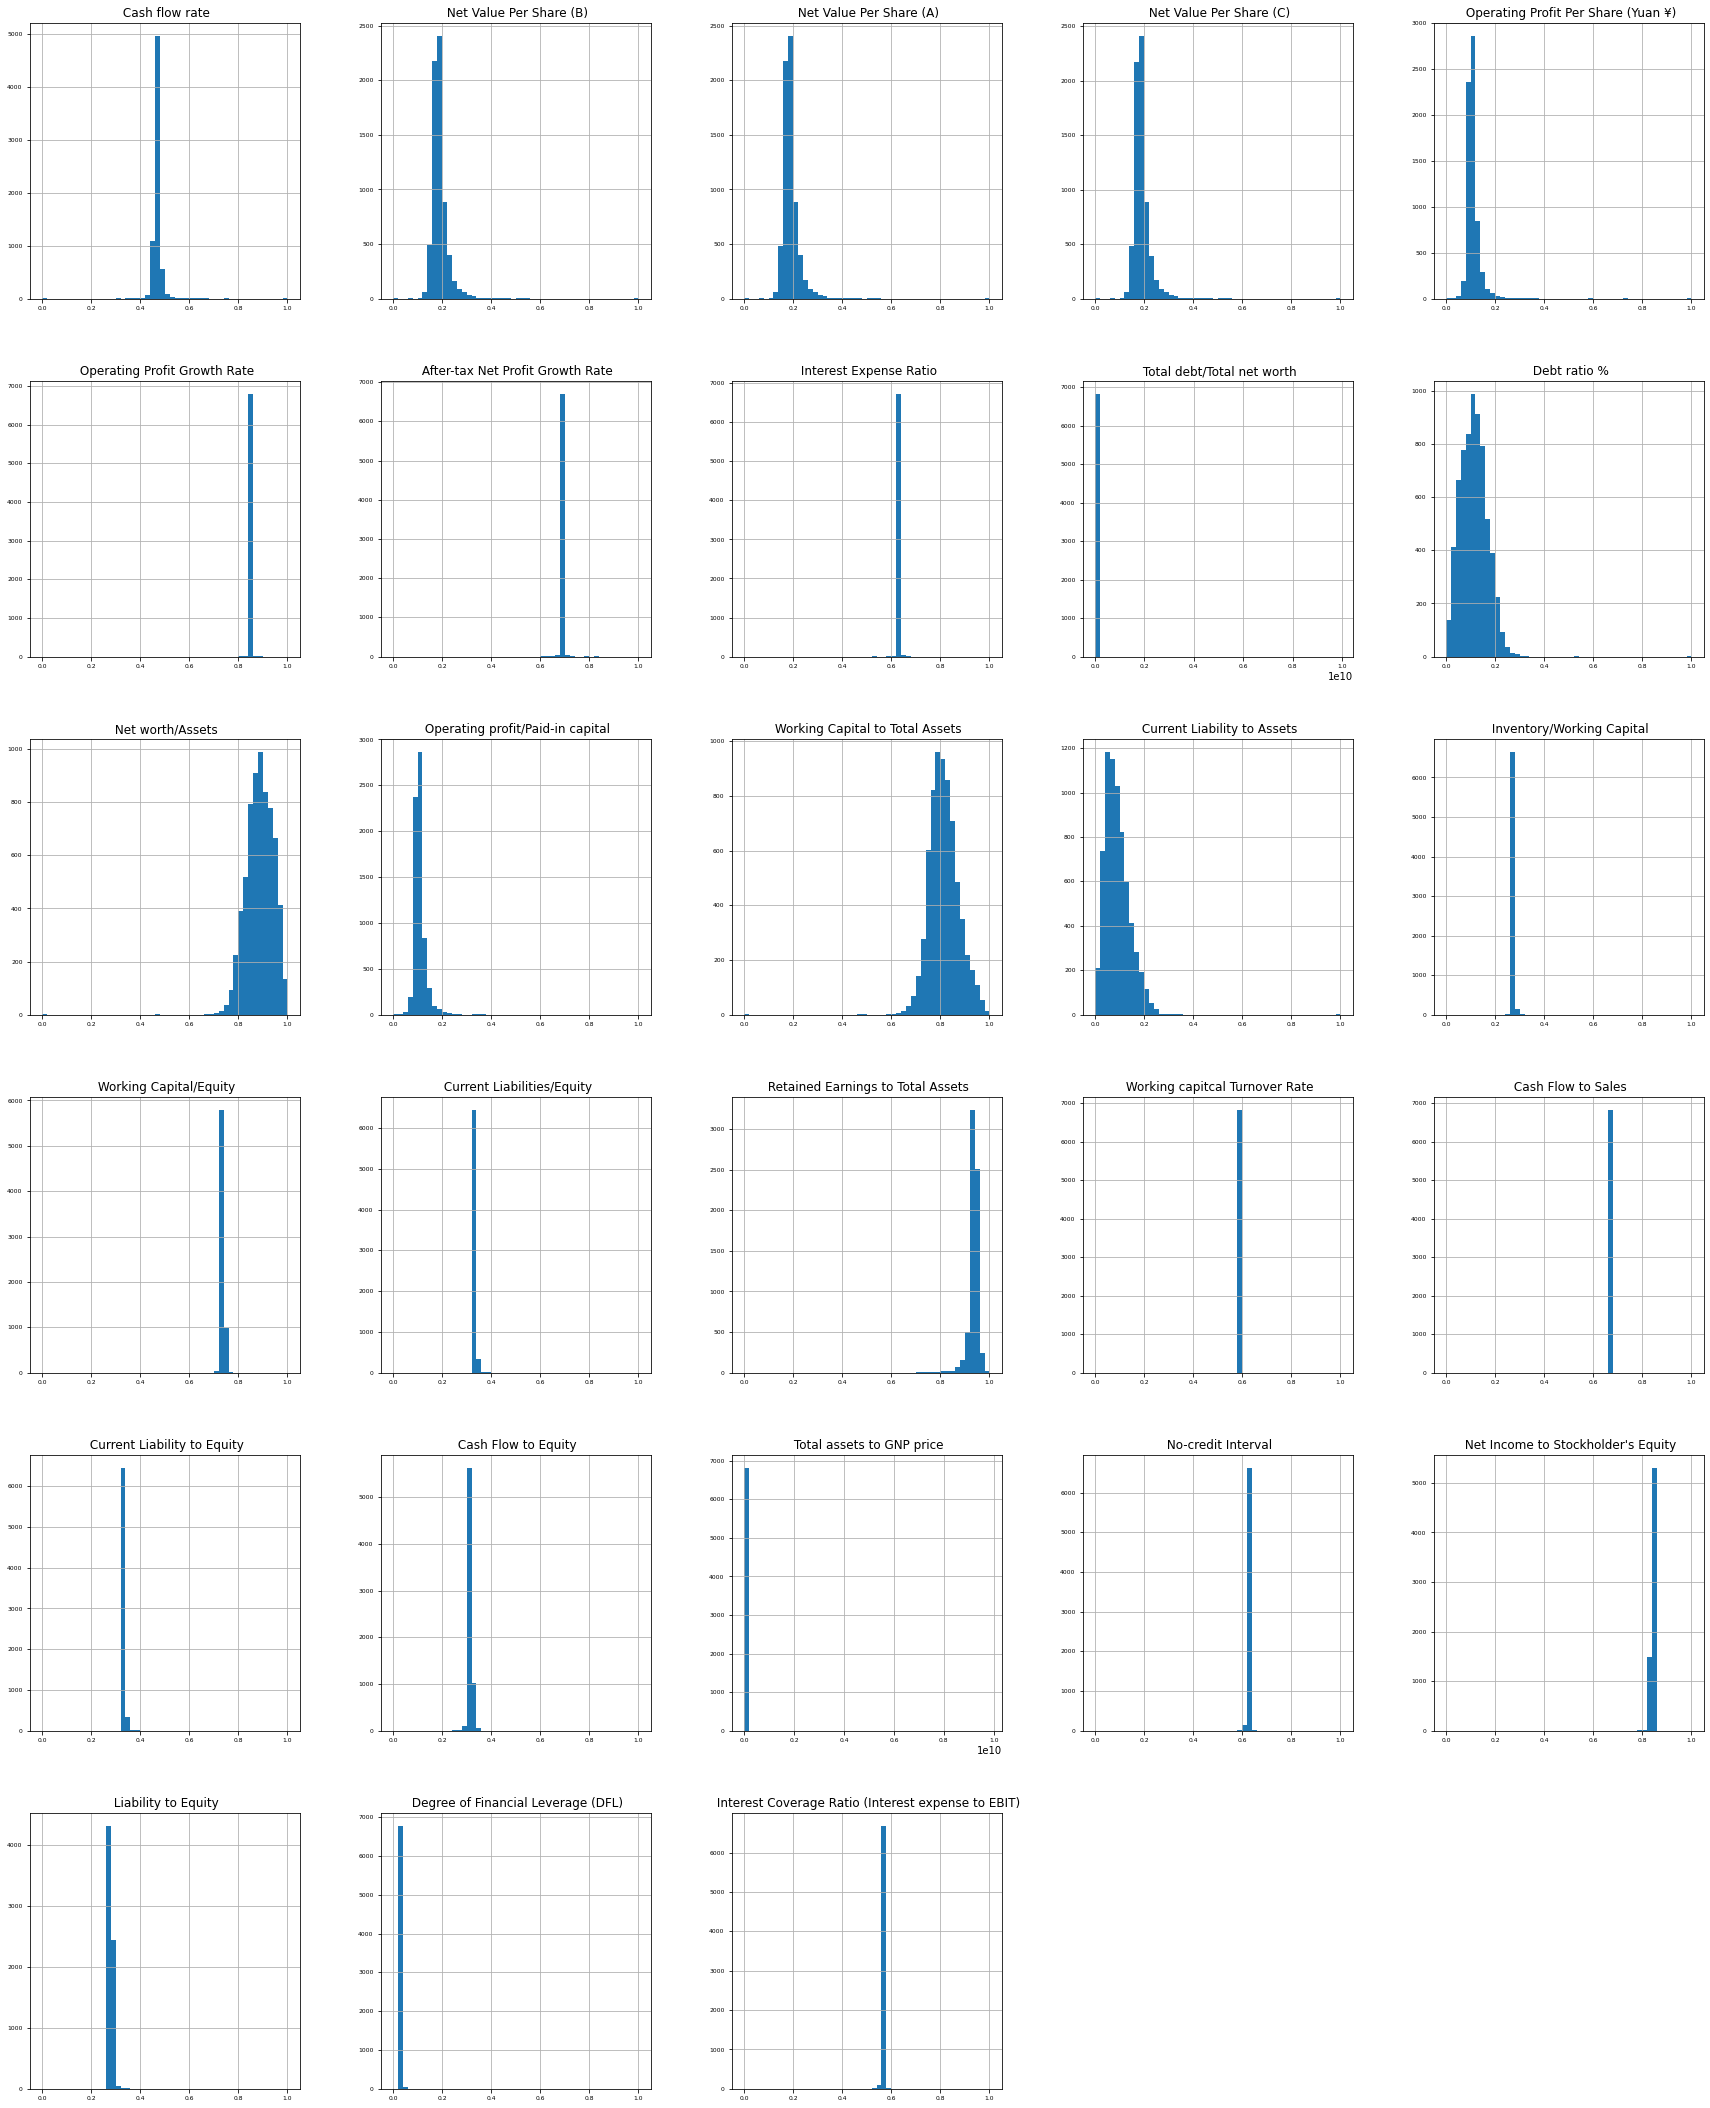

In [46]:
X[norm_dist_df['feature']].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

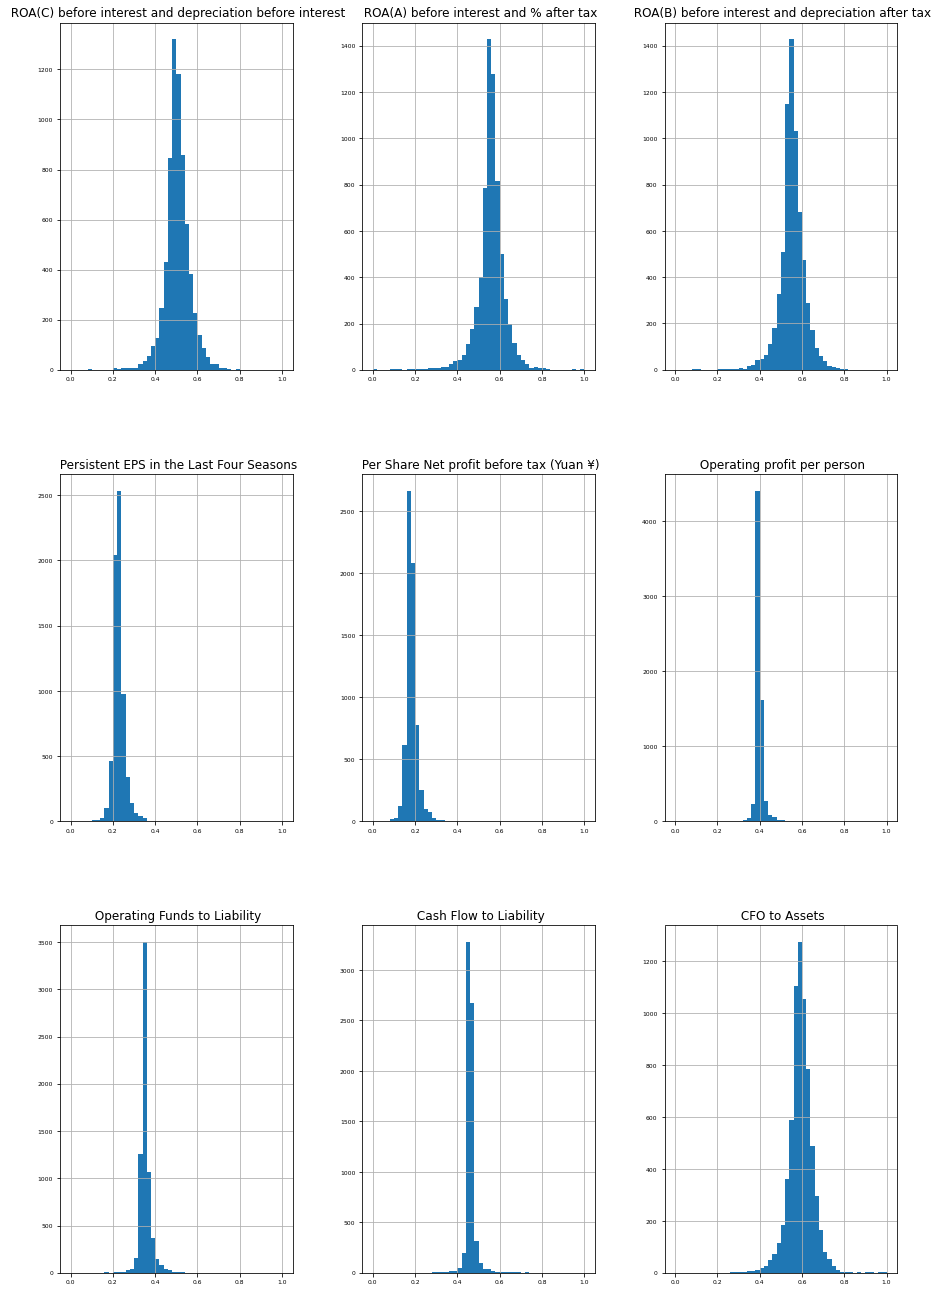

In [47]:
X[t_dist_df['feature']].hist(figsize=(15,23), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

In [48]:
X[lognorm_dist_df['feature']].hist(figsize=(10,10), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

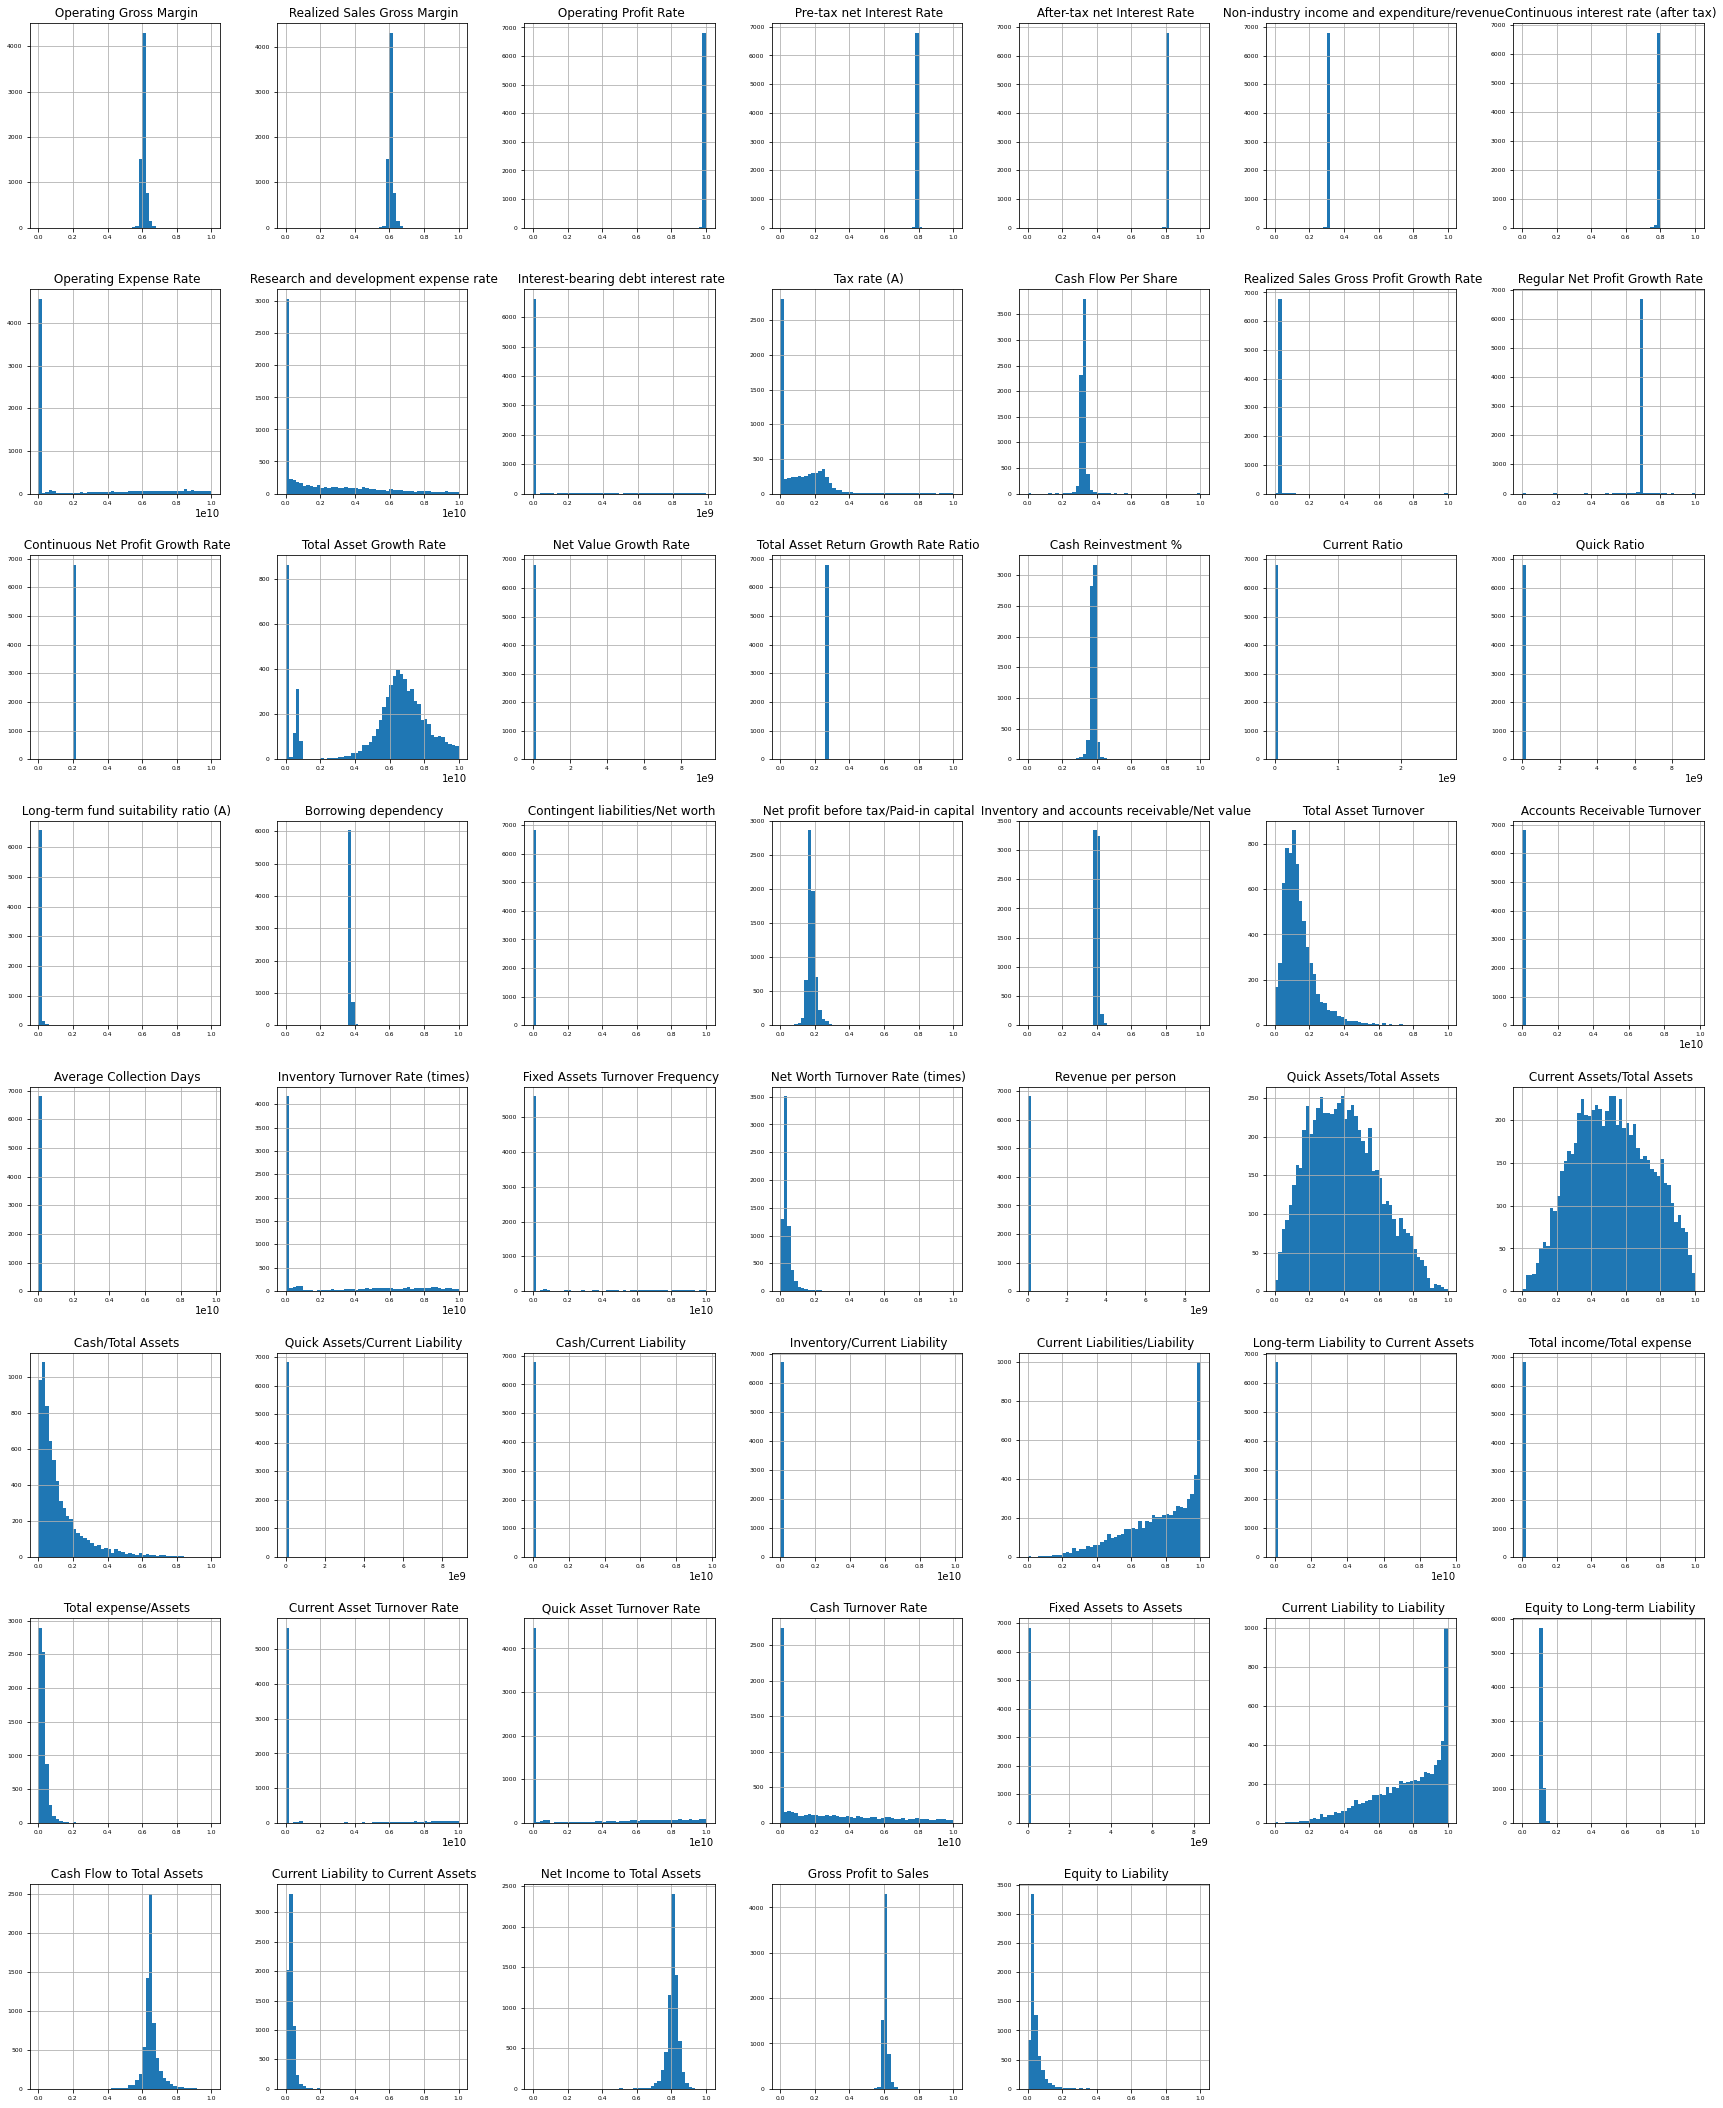

In [49]:
X[other_dist_df['feature']].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

In [111]:
other_dist_df[other_dist_df['feature']==" Cash/Total Assets"]

feature     score   model
35   Cash/Total Assets  0.038582  pareto

In [50]:
corr = df.corr()

# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df[(corr_df['correlation']<0.8) & (corr_df['correlation']>-0.8)]

feature_1  \
8238                         Net Income to Total Assets   
6546                  Retained Earnings to Total Assets   
8724                                Liability to Equity   
7596                      Equity to Long-term Liability   
114    ROA(C) before interest and depreciation befor...   
...                                                 ...   
6360                         Current Liabilities/Equity   
3960                   Contingent liabilities/Net worth   
6216                             Working Capital/Equity   
8641                 Net Income to Stockholder's Equity   
8735                                Liability to Equity   

                                     feature_2  correlation  
8238         Retained Earnings to Total Assets     0.794189  
6546                Net Income to Total Assets     0.794189  
8724             Equity to Long-term Liability     0.778135  
7596                       Liability to Equity     0.778135  
114    Persistent EPS in the Last Four Seasons     0.775006  
...                                        ...          ...  
6360        Net Income to Stockholder's Equity    -0.749621  
3960                    Working Capital/Equity    -0.767778  
6216          Contingent liabilities/Net worth    -0.767778  
8641                       Liability to Equity    -0.791836  
8735        Net Income to Stockholder's Equity    -0.791836  

[8844 rows x 3 columns]

In [51]:
corr_df[(corr_df['correlation']>0.8) | (corr_df['correlation']<-0.8)]

feature_1                        feature_2  \
7379       Current Liability to Liability    Current Liabilities/Liability   
7476          Current Liability to Equity       Current Liabilities/Equity   
6157        Current Liabilities/Liability   Current Liability to Liability   
6348           Current Liabilities/Equity      Current Liability to Equity   
8459                Gross Profit to Sales           Operating Gross Margin   
...                                   ...                              ...   
8590   Net Income to Stockholder's Equity             Borrowing dependency   
3670                     Net worth/Assets      Current Liability to Assets   
5738          Current Liability to Assets                 Net worth/Assets   
3647                     Net worth/Assets                     Debt ratio %   
3553                         Debt ratio %                 Net worth/Assets   

      correlation  
7379     1.000000  
7476     1.000000  
6157     1.000000  
6348     1.000000  
8459     1.000000  
...           ...  
8590    -0.806478  
3670    -0.842583  
5738    -0.842583  
3647    -1.000000  
3553    -1.000000  

[86 rows x 3 columns]

In [52]:
corr_df['ordered-cols'] = corr_df.apply(lambda x: '-'.join(sorted([x['feature_1'],x['feature_2']])),axis=1)
corr_df = corr_df.drop_duplicates(['ordered-cols'])
corr_df.drop(['ordered-cols'], axis=1, inplace=True)

In [110]:
pd.DataFrame(corr_df[(corr_df['correlation']>0.8) | (corr_df['correlation']<-0.8)])

feature_1  \
7379                     Current Liability to Liability   
7476                        Current Liability to Equity   
8459                              Gross Profit to Sales   
1727                            Net Value Per Share (C)   
385                              Operating Gross Margin   
564                         Realized Sales Gross Margin   
1537                            Net Value Per Share (B)   
1538                            Net Value Per Share (B)   
2132                Operating Profit Per Share (Yuan ¥)   
2591                     Regular Net Profit Growth Rate   
675                           Pre-tax net Interest Rate   
286    ROA(B) before interest and depreciation after...   
767                         After-tax net Interest Rate   
958                Continuous interest rate (after tax)   
8711                                Liability to Equity   
7501                        Current Liability to Equity   
2228           Per Share Net profit before tax (Yuan ¥)   
8172                         Net Income to Total Assets   
1848            Persistent EPS in the Last Four Seasons   
3891                               Borrowing dependency   
287    ROA(B) before interest and depreciation after...   
2204           Per Share Net profit before tax (Yuan ¥)   
7010                     Working capitcal Turnover Rate   
191              ROA(A) before interest and % after tax   
671                           Pre-tax net Interest Rate   
956                Continuous interest rate (after tax)   
8173                         Net Income to Total Assets   
6310                         Current Liabilities/Equity   
7450                        Current Liability to Equity   
8171                         Net Income to Total Assets   
4033                   Operating profit/Paid-in capital   
4107              Net profit before tax/Paid-in capital   
5808                       Operating Funds to Liability   
2109                Operating Profit Per Share (Yuan ¥)   
4009                   Operating profit/Paid-in capital   
766                         After-tax net Interest Rate   
2113                Operating Profit Per Share (Yuan ¥)   
4013                   Operating profit/Paid-in capital   
5737                        Current Liability to Assets   
7545                      Equity to Long-term Liability   
3890                               Borrowing dependency   
3670                                   Net worth/Assets   
3647                                   Net worth/Assets   

                                              feature_2  correlation  
7379                      Current Liabilities/Liability     1.000000  
7476                         Current Liabilities/Equity     1.000000  
8459                             Operating Gross Margin     1.000000  
1727                            Net Value Per Share (A)     0.999837  
385                         Realized Sales Gross Margin     0.999518  
564                               Gross Profit to Sales     0.999518  
1537                            Net Value Per Share (A)     0.999342  
1538                            Net Value Per Share (C)     0.999179  
2132                   Operating profit/Paid-in capital     0.998696  
2591                   After-tax Net Profit Growth Rate     0.996186  
675                Continuous interest rate (after tax)     0.993617  
286    ROA(C) before interest and depreciation befor...     0.986849  
767                           Pre-tax net Interest Rate     0.986379  
958                         After-tax net Interest Rate     0.984452  
8711                         Current Liabilities/Equity     0.963908  
7501                                Liability to Equity     0.963908  
2228              Net profit before tax/Paid-in capital     0.962723  
8172             ROA(A) before interest and % after tax     0.961552  
1848              Net profit before tax/Paid-in capital     0.959461  
3891                         

In [53]:
pd.DataFrame(corr_df[(corr_df['correlation']>0.8) | (corr_df['correlation']<-0.8)]['feature_1'].value_counts())

feature_1
 Current Liability to Equity                                3
 Net Income to Total Assets                                 3
 Operating profit/Paid-in capital                           3
 Operating Profit Per Share (Yuan ¥)                        3
 Borrowing dependency                                       2
 Net Value Per Share (B)                                    2
 Pre-tax net Interest Rate                                  2
 Continuous interest rate (after tax)                       2
 ROA(B) before interest and depreciation after tax          2
 After-tax net Interest Rate                                2
 Net worth/Assets                                           2
 Per Share Net profit before tax (Yuan ¥)                   2
 Gross Profit to Sales                                      1
 Current Liability to Assets                                1
 Operating Gross Margin                                     1
 Equity to Long-term Liability                              1
 Liability to Equity                                        1
 Net profit before tax/Paid-in capital                      1
 Current Liability to Liability                             1
 Operating Funds to Liability                               1
 Current Liabilities/Equity                                 1
 Net Value Per Share (C)                                    1
 Regular Net Profit Growth Rate                             1
 Realized Sales Gross Margin                                1
 ROA(A) before interest and % after tax                     1
 Persistent EPS in the Last Four Seasons                    1
 Working capitcal Turnover Rate                             1

In [54]:
pd.DataFrame(corr_df[(corr_df['correlation']>0.8) | (corr_df['correlation']<-0.8)]['feature_2'].value_counts())

feature_2
 Borrowing dependency                                       3
 Net profit before tax/Paid-in capital                      3
 Operating Profit Rate                                      3
 Persistent EPS in the Last Four Seasons                    3
 ROA(C) before interest and depreciation before...          3
 Per Share Net profit before tax (Yuan ¥)                   2
 Current Liabilities/Equity                                 2
 Debt ratio %                                               2
 ROA(A) before interest and % after tax                     2
 Liability to Equity                                        2
 Net Value Per Share (A)                                    2
 Net Income to Stockholder's Equity                         1
 Net Value Per Share (C)                                    1
 Operating Gross Margin                                     1
 Pre-tax net Interest Rate                                  1
 Continuous interest rate (after tax)                       1
 Current Liability to Assets                                1
 Cash Flow to Sales                                         1
 ROA(B) before interest and depreciation after tax          1
 Gross Profit to Sales                                      1
 Realized Sales Gross Margin                                1
 Operating Profit Per Share (Yuan ¥)                        1
 Current Liabilities/Liability                              1
 After-tax net Interest Rate                                1
 Operating profit/Paid-in capital                           1
 Cash flow rate                                             1
 After-tax Net Profit Growth Rate                           1

In [55]:
bankrupt_corr_df = corr_df[corr_df['feature_1'] == 'Bankrupt?']
bankrupt_corr_df.sort_values(by="correlation",ascending=False, inplace=True)
bankrupt_corr_df

feature_1                                          feature_2  correlation
37  Bankrupt?                                       Debt ratio %     0.250161
91  Bankrupt?                                Liability to Equity     0.166812
66  Bankrupt?                         Current Liabilities/Equity     0.153828
85  Bankrupt?                              Liability-Assets Flag     0.139212
79  Bankrupt?                      Equity to Long-term Liability     0.139014
59  Bankrupt?                             Cash/Current Liability     0.077921
44  Bankrupt?        Inventory and accounts receivable/Net value     0.075278
49  Bankrupt?                    Fixed Assets Turnover Frequency     0.072818
41  Bankrupt?                   Contingent liabilities/Net worth     0.070455
76  Bankrupt?                             Fixed Assets to Assets     0.066328
87  Bankrupt?                          Total assets to GNP price     0.035104
34  Bankrupt?                                        Quick Ratio     0.025058
39  Bankrupt?               Long-term fund suitability ratio (A)     0.016920
71  Bankrupt?                        Current Asset Turnover Rate     0.011929
53  Bankrupt?                         Allocation rate per person     0.002829
67  Bankrupt?              Long-term Liability to Current Assets     0.000778
75  Bankrupt?                                 Cash Flow to Sales     0.000479
6   Bankrupt?                              Operating Profit Rate    -0.000230
24  Bankrupt?            Realized Sales Gross Profit Growth Rate    -0.000458
48  Bankrupt?                    Inventory Turnover Rate (times)    -0.001376
73  Bankrupt?                     Working capitcal Turnover Rate    -0.002894
58  Bankrupt?                     Quick Assets/Current Liability    -0.003823
21  Bankrupt?                         Revenue Per Share (Yuan ¥)    -0.004692
46  Bankrupt?                       Accounts Receivable Turnover    -0.004754
93  Bankrupt?   Interest Coverage Ratio (Interest expense to ...    -0.005509
88  Bankrupt?                                 No-credit Interval    -0.005547
47  Bankrupt?                            Average Collection Days    -0.006556
69  Bankrupt?                         Total income/Total expense    -0.007137
7   Bankrupt?                          Pre-tax net Interest Rate    -0.008517
77  Bankrupt?                     Current Liability to Liability    -0.020809
14  Bankrupt?                Interest-bearing debt interest rate    -0.023063
12  Bankrupt?              Research and development expense rate    -0.024232
26  Bankrupt?                   After-tax Net Profit Growth Rate    -0.037783
81  Bankrupt?                             Cash Flow to Liability    -0.043125
56  Bankrupt?                        Current Assets/Total Assets    -0.044823
32  Bankrupt?                                Cash Reinvestment %    -0.051345
45  Bankrupt?                               Total Asset Turnover    -0.067915
13  Bankrupt?                                     Cash flow rate    -0.072356
20  Bankrupt?                                Cash Flow Per Share    -0.077516
94  Bankrupt?                                Equity to Liability    -0.083048
55  Bankrupt?                          Quick Assets/Total Assets    -0.086382
52  Bankrupt?                        Operating profit per person    -0.092842
5   Bankrupt?                        Realized Sales Gross Margin    -0.099445
4   Bankrupt?                             Operating Gross Margin    -0.100043
57  Bankrupt?                                  Cash/Total Assets    -0.100130
42  Bankrupt?                   Operating profit/Paid-in capital    -0.141111
65  Bankrupt?                             Working Capital/Equity    -0.147221
16  Bankrupt?                            Net Value Per Share (B)    -0.165399
90  Bankrupt?                 Net Income to Stockholder's Equity    -0.180987
23  Bankrupt?           Per Share Net profit before tax (Yuan ¥)    -0.201395
68  Bankrupt?             

In [56]:
# # Perform Permutation
# permutation_score = permutation_importance(knn,
#                                            X_test, y_test,
#                                            scoring='recall',
#                                            random_state=3,
#                                            n_repeats=100) 

# # Unstack results
# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) 

# importance_df.columns=['feature','feature importance']

# # Order by importance
# importance_df.sort_values(by="feature importance", ascending = False) 

# Preprocessing

In [57]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,stratify=y)

In [58]:
def log_scale(col):
    col = np.log1p(col)
    return col

In [59]:
mm_transformer = Pipeline(steps=[
       ('mm_scaler', MinMaxScaler())
])
ss_transformer = Pipeline(steps=[
       ('ss_scaler', StandardScaler())
])
rb_transformer = Pipeline(steps=[
       ('rb_scaler', RobustScaler())
])
log_transformer = Pipeline(steps=[
       ('log_transformer', FunctionTransformer(log_scale))
])

In [60]:
other_dist_list = list(other_dist_df['feature'])
norm_dist_list = list(norm_dist_df['feature'])
t_dist_list = list(t_dist_df['feature'])
lognorm_dist_list = list(lognorm_dist_df['feature'])

In [61]:
preprocessor = ColumnTransformer(
   transformers=[
    ('mm_transform', mm_transformer, other_dist_list)
    ,('ss_transform', ss_transformer, norm_dist_list)
    ,('rs_transform', rb_transformer, t_dist_list)
    ,('log_transform', log_transformer, lognorm_dist_list)
])

In [62]:
preprocess = Pipeline(steps=[('preprocessor', preprocessor)])

In [63]:
# training_transformed = preprocess.fit_transform(X_train)
# pd.DataFrame(training_transformed)

In [64]:
pipe_logistic = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('logistic', LogisticRegression())
           ])

In [65]:
pipe_logistic.fit(X_train,y_train)
cross_val_score(pipe_logistic,X_train, y_train,cv=5,scoring='recall').mean()

0.21818181818181817

In [66]:
pipe_logistic_ypred = pipe_logistic.predict(X_test)
print(confusion_matrix(y_test,pipe_logistic_ypred))
print('')
print(classification_report(y_test,pipe_logistic_ypred))

[[1637   13]
 [  44   11]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.46      0.20      0.28        55

    accuracy                           0.97      1705
   macro avg       0.72      0.60      0.63      1705
weighted avg       0.96      0.97      0.96      1705



In [67]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [68]:
pipe_logistic2 = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('logistic', LogisticRegression())
           ])

In [69]:
pipe_logistic2.fit(X_train,y_train)
cross_val_score(pipe_logistic,X_train, y_train,cv=5,scoring='recall').mean()

0.21818181818181817

In [70]:
pipe_logistic2_ypred = pipe_logistic2.predict(X_test)
print(confusion_matrix(y_test,pipe_logistic2_ypred))
print('')
print(classification_report(y_test,pipe_logistic2_ypred))

[[1455  195]
 [  17   38]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.16      0.69      0.26        55

    accuracy                           0.88      1705
   macro avg       0.58      0.79      0.60      1705
weighted avg       0.96      0.88      0.91      1705



In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
decision_tree = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('decision_tree', DecisionTreeClassifier())
           ])

In [73]:
decision_tree.fit(X_train,y_train)
cross_val_score(decision_tree,X_train, y_train,cv=5,scoring='recall').mean()

0.4424242424242425

In [74]:
decision_tree_ypred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,decision_tree_ypred))
print('')
print(classification_report(y_test,decision_tree_ypred))

[[1557   93]
 [  29   26]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1650
           1       0.22      0.47      0.30        55

    accuracy                           0.93      1705
   macro avg       0.60      0.71      0.63      1705
weighted avg       0.96      0.93      0.94      1705



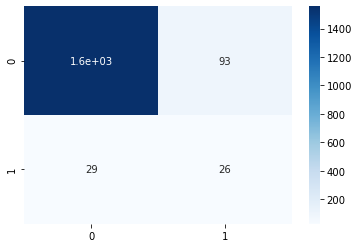

In [75]:
sns.heatmap(confusion_matrix(y_test,decision_tree_ypred), annot=True, cmap='Blues');

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('random_forest', RandomForestClassifier())
           ])

In [78]:
random_forest.fit(X_train,y_train)
cross_val_score(random_forest,X_train, y_train,cv=5,scoring='recall').mean()

0.4424242424242425

In [79]:
random_forest_ypred = random_forest.predict(X_test)
print(confusion_matrix(y_test,random_forest_ypred))
print('')
print(classification_report(y_test,random_forest_ypred))

[[1603   47]
 [  28   27]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.36      0.49      0.42        55

    accuracy                           0.96      1705
   macro avg       0.67      0.73      0.70      1705
weighted avg       0.96      0.96      0.96      1705



In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
adaboost = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('adaboost', AdaBoostClassifier())
           ])

In [82]:
adaboost.fit(X_train,y_train)
cross_val_score(adaboost,X_train, y_train,cv=5,scoring='recall').mean()

0.593939393939394

In [83]:
adaboost_ypred = adaboost.predict(X_test)
print(confusion_matrix(y_test,adaboost_ypred))
print('')
print(classification_report(y_test,adaboost_ypred))

[[1527  123]
 [  21   34]]

              precision    recall  f1-score   support

           0       0.99      0.93      0.95      1650
           1       0.22      0.62      0.32        55

    accuracy                           0.92      1705
   macro avg       0.60      0.77      0.64      1705
weighted avg       0.96      0.92      0.93      1705



In [84]:
from sklearn.svm import SVC

In [85]:
svc = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('svc', SVC())
           ])

In [86]:
svc.fit(X_train,y_train)
cross_val_score(svc,X_train, y_train,cv=5,scoring='recall').mean()

0.7212121212121213

In [87]:
svc_ypred = svc.predict(X_test)
print(confusion_matrix(y_test,svc_ypred))
print('')
print(classification_report(y_test,svc_ypred))

[[1452  198]
 [  15   40]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.17      0.73      0.27        55

    accuracy                           0.88      1705
   macro avg       0.58      0.80      0.60      1705
weighted avg       0.96      0.88      0.91      1705



In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('knn', KNeighborsClassifier())
           ])

In [90]:
knn.fit(X_train,y_train)
cross_val_score(knn,X_train, y_train,cv=5,scoring='recall').mean()

0.7212121212121213

In [91]:
knn_ypred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_ypred))
print('')
print(classification_report(y_test,knn_ypred))

[[1454  196]
 [  15   40]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.17      0.73      0.27        55

    accuracy                           0.88      1705
   macro avg       0.58      0.80      0.60      1705
weighted avg       0.96      0.88      0.91      1705



In [104]:
sns.heatmap(confusion_matrix(y_test,knn_ypred), annot=True, cmap='Blues');

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import random

In [115]:
space = {
    'knn__n_neighbors': random.randint(3, int(round(np.sqrt(len(X_train.index))))),
    'knn__weights':['uniform', 'distance'],
    'knn__metric': ['euclidean','manhattan']
}

In [94]:
knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'knn', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__mm_transform', 'preprocessor__ss_transform', 'preprocessor__rs_transform', 'preprocessor__log_transform', 'preprocessor__mm_transform__memory', 'preprocessor__mm_transform__steps', 'preprocessor__mm_transform__verbose', 'preprocessor__mm_transform__mm_scaler', 'preprocessor__mm_transform__mm_scaler__clip', 'preprocessor__mm_transform__mm_scaler__copy', 'preprocessor__mm_transform__mm_scaler__feature_range', 'preprocessor__ss_transform__memory', 'preprocessor__ss_transform__steps', 'preprocessor__ss_transform__verbose', 'preprocessor__ss_transform__ss_scaler', 'preprocessor__ss_transform__ss_scaler__copy', 'preprocessor__ss_transform__ss_scaler__with_mean', 'preprocessor__ss_transform__ss_scaler__with_std', 'preprocessor__rs_t

In [116]:
randomS = RandomizedSearchCV(knn, param_distributions = space, n_iter=500, n_jobs=-1, cv=5, random_state=0, verbose=3)#n_jobs=-1 permet d'utiliser toutes les capacités de la machine
randomS.fit(X_train, y_train)

TypeError: Parameter value is not iterable or distribution (key='knn__n_neighbors', value=64)

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
dic = {'SVC': svc_ypred, 'KNN': knn_ypred, 'Reg Logist': pipe_logistic2_ypred}
pred_models = pd.DataFrame(dic)
pred_models_corr = pred_models.corr()
# Unstack correlation matrix 
pred_models_corr = pred_models_corr.unstack().reset_index() 
pred_models_corr

# rename columns
pred_models_corr.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
pred_models_corr.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
pred_models_corr = pred_models_corr[pred_models_corr['feature_1'] != pred_models_corr['feature_2']]
pred_models_corr

feature_1   feature_2  correlation
2         SVC  Reg Logist     0.800529
6  Reg Logist         SVC     0.800529
1         SVC         KNN     0.593258
3         KNN         SVC     0.593258
5         KNN  Reg Logist     0.557491
7  Reg Logist         KNN     0.557491

In [98]:
#logistic regression | svc | knn

In [99]:
estimators = [
    ('svc', svc),
    ('lr', pipe_logistic2),
    ('knn', knn)
]

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())

In [101]:
clf.fit(X_train,y_train)
cross_val_score(clf,X_train, y_train,cv=5,scoring='recall').mean()

0.12121212121212119

In [102]:
# cv=

In [103]:
clf_ypred = clf.predict(X_test)
print(confusion_matrix(y_test,clf_ypred))
print('')
print(classification_report(y_test,clf_ypred))

[[1636   14]
 [  45   10]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.42      0.18      0.25        55

    accuracy                           0.97      1705
   macro avg       0.69      0.59      0.62      1705
weighted avg       0.96      0.97      0.96      1705



# Pickle

In [113]:
with open("model.pkl", "wb") as file:
    pickle.dump(knn, file)